In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/tcm6/B1240/32x32/stim_resp_32x32_256/enc_test_256.npy')
stim_resp = np.load('/mnt/cube/srrudrar/tcm6/B1240/32x32/stim_resp_32x32_256/resp_test_256.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 256), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 256), (5706, 214))

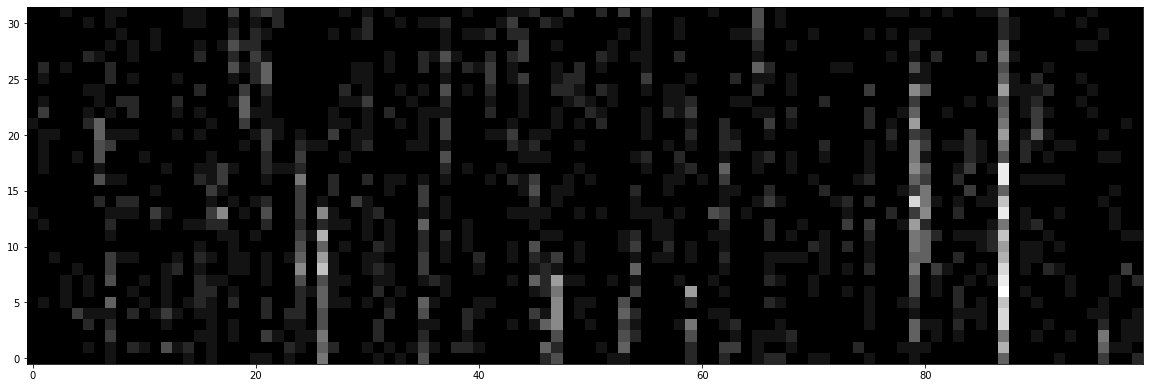

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process_B1240.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/tcm6/B1240/32x32/stim_resp_32x32_256/test_set_mne/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 256
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.150721
    2       0    0.146667
    3       0    0.145156
    4       0    0.143874
    5       0    0.141289
    6       0    0.143427
    7       1    0.142669
    8       2    0.142148
    9       3    0.141512
   10       4    0.142902
   11       5    0.143274
   12       6    0.142942
   13       7    0.141782
   14       8    0.141677
   15       9    0.142016
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160337
    2       0    0.159576
    3       0    0.156949
    4       0    0.159518
    5       1    0.164644
    6       2    0.162382
    7       3    0.158956
    8       4    0.155440
    9       0    0.156945
   10       1    0.157633
   11       2    0.154937
   12       0    0.154381
   13       0    0.155743
   14       1    0.156245
   15       2    0.156411
   16       3    0.157700
   17       4    0.156882
   18       5    0.157882
   19       6    0.159807
   20       7    0.160764
   21       

    8       0    0.091387
    9       1    0.091891
   10       2    0.091185
   11       0    0.091729
   12       1    0.091683
   13       2    0.091438
   14       3    0.091721
   15       4    0.091851
   16       5    0.091563
   17       6    0.091189
   18       7    0.091211
   19       8    0.091160
   20       0    0.091353
   21       1    0.091297
   22       2    0.091212
   23       3    0.091261
   24       4    0.091546
   25       5    0.092030
   26       6    0.091912
   27       7    0.092019
   28       8    0.092243
   29       9    0.092239
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.094186
    2       0    0.092098
    3       0    0.091958
    4       0    0.091216
    5       0    0.090084
    6       0    0.089945
    7       0    0.089646
    8       0    0.089298
    9       0    0.089398
   10       1    0.089256
   11       0    0.089073
   12       0    0.089607
   13       1    0.089776
   14       2    0.089270
   15       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.205209
    2       0    0.195979
    3       0    0.196000
    4       1    0.194072
    5       0    0.192739
    6       0    0.192590
    7       0    0.192825
    8       1    0.193269
    9       2    0.193673
   10       3    0.191474
   11       0    0.190909
   12       0    0.190984
   13       1    0.191896
   14       2    0.192434
   15       3    0.193955
   16       4    0.194825
   17       5    0.194009
   18       6    0.192974
   19       7    0.192433
   20       8    0.192788
   21       9    0.192674
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.195486
    2       0    0.189916
    3       0    0.188456
    4       0    0.186247
    5       0    0.185247
    6       0    0.185997
    7       1    0.186287
    8       2    0.187061
    9       3    0.185506
   10       4    0.185297
   11       5    0.186410
   12       6    0.186611
   13       7    0.185675
   14       8    0.185345
   15       9    0.185676
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.194998
    2       0    0.192838
    3       0    0.191267
    4       0    0.189830
    5       0    0.189247
    6       0    0.188389
    7       0    0.188319
    8       0    0.188599
    9       1    0.188087
   10       0    0.188628
   11       1    0.188863
   12       2    0.187575
   13       0    0.187621
   14       1    0.187708
   15       2    0.187719
   16       3    0.187525
   17       0    0.187389
   18       0    0.187375
   19       0    0.187456
   20       1    0.187362
   21       0    0.187270
   22       0    0.187319
   23       1    0.187255
   24       0    0.187651
   25       1    0.187747
   26       2    0.187784
   27       3    0.188264
   28       4    0.188742
   29       5    0.191215
   30       6    0.192614
   31       7    0.192223
   32       8    0.192015
   33       9    0.191899
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.191884
    2       0    0.186217
    3       0    0.180673
    4       0    0.179542
    5       0    0.179408
    6       0    0.180344
    7       1    0.179905
    8       2    0.180302
    9       3    0.179419
   10       4    0.178768
   11       0    0.179347
   12       1    0.178951
   13       2    0.180773
   14       3    0.180997
   15       4    0.179714
   16       5    0.178964
   17       6    0.178820
   18       7    0.178822
   19       8    0.179702
   20       9    0.179687
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.070887
    2       0    0.069737
    3       0    0.069159
    4       0    0.068620
    5       0    0.068323
    6       0    0.067914
    7       0    0.067457
    8       0    0.067405
    9       0    0.067349
   10       0    0.067020
   11       0    0.067055
   12       1    0.066879
   13       0    0.066788
   14       0    0.066892
   15       1    0.066861
   16       2    0.066967
   17       

   13       4    0.133488
   14       5    0.133302
   15       6    0.132757
   16       7    0.133492
   17       8    0.134090
   18       9    0.134796
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.130804
    2       0    0.130462
    3       0    0.128434
    4       0    0.126252
    5       0    0.124837
    6       0    0.124321
    7       0    0.125339
    8       1    0.124101
    9       0    0.124504
   10       1    0.125778
   11       2    0.126817
   12       3    0.126238
   13       4    0.125751
   14       5    0.125181
   15       6    0.125408
   16       7    0.125701
   17       8    0.125300
   18       9    0.125366
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.136970
    2       0    0.135421
    3       0    0.134940
    4       0    0.131780
    5       0    0.130324
    6       0    0.129218
    7       0    0.129109
    8       0    0.131017
    9       1    0.131881
   10       2    0.129792
   11       

   18       9    0.104914
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.109337
    2       0    0.106638
    3       0    0.105512
    4       0    0.105909
    5       1    0.104997
    6       0    0.104404
    7       0    0.103781
    8       0    0.104191
    9       1    0.104292
   10       2    0.104104
   11       3    0.104831
   12       4    0.105322
   13       5    0.105031
   14       6    0.104816
   15       7    0.104932
   16       8    0.104859
   17       9    0.106792
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.037675
    2       0    0.037030
    3       0    0.035148
    4       0    0.035671
    5       1    0.035563
    6       2    0.035381
    7       3    0.035556
    8       4    0.035415
    9       5    0.035540
   10       6    0.036148
   11       7    0.036397
   12       8    0.036701
   13       9    0.036544
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.041850
    2       

   22       1    0.617475
   23       2    0.617242
   24       3    0.617404
   25       4    0.617620
   26       5    0.617538
   27       6    0.617086
   28       7    0.616890
   29       0    0.617059
   30       1    0.617044
   31       2    0.616756
   32       0    0.616878
   33       1    0.617166
   34       2    0.617217
   35       3    0.617590
   36       4    0.618961
   37       5    0.619370
   38       6    0.620394
   39       7    0.621309
   40       8    0.621305
   41       9    0.621059
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.627511
    2       0    0.623349
    3       0    0.619966
    4       0    0.616061
    5       0    0.615403
    6       0    0.617047
    7       1    0.618297
    8       2    0.615040
    9       0    0.612705
   10       0    0.612453
   11       0    0.611878
   12       0    0.611882
   13       1    0.611884
   14       2    0.610805
   15       0    0.610359
   16       0    0.610152
   17       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    2       0    0.314472
    3       0    0.319332
    4       1    0.322333
    5       2    0.313809
    6       0    0.315008
    7       1    0.315702
    8       2    0.314250
    9       3    0.312712
   10       0    0.310709
   11       0    0.310678
   12       0    0.309600
   13       0    0.309242
   14       0    0.308840
   15       0    0.309226
   16       1    0.309203
   17       2    0.309751
   18       3    0.311331
   19       4    0.311132
   20       5    0.310134
   21       6    0.309660
   22       7    0.309956
   23       8    0.308766
   24       0    0.309032
   25       1    0.309395
   26       2    0.310044
   27       3    0.311410
   28       4    0.313715
   29       5    0.313625
   30       6    0.312667
   31       7    0.312620
   32       8    0.312522
   33       9    0.311980
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.300015
    2       0    0.296930
    3       0    0.297728
    4       1    0.295952
    5       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.245520
    2       0    0.243349
    3       0    0.239411
    4       0    0.238040
    5       0    0.237341
    6       0    0.237060
    7       0    0.236706
    8       0    0.236041
    9       0    0.235334
   10       0    0.235203
   11       0    0.235083
   12       0    0.234637
   13       0    0.234508
   14       0    0.234452
   15       0    0.233749
   16       0    0.233762
   17       1    0.233661
   18       0    0.233390
   19       0    0.232862
   20       0    0.233007
   21       1    0.233289
   22       2    0.233203
   23       3    0.233155
   24       4    0.233059
   25       5    0.232614
   26       0    0.232760
   27       1    0.232833
   28       2    0.233505
   29       3    0.233656
   30       4    0.233936
   31       5    0.233996
   32       6    0.233095
   33       7    0.233197
   34       8    0.234127
   35       9    0.234557
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.249207
    2       0    0.249686
    3       0    0.252240
    4       1    0.249365
    5       0    0.249526
    6       1    0.248356
    7       0    0.247724
    8       0    0.244880
    9       0    0.243627
   10       0    0.242792
   11       0    0.242180
   12       0    0.241813
   13       0    0.240775
   14       0    0.241198
   15       1    0.240761
   16       0    0.241197
   17       1    0.241733
   18       2    0.241975
   19       3    0.245917
   20       4    0.244658
   21       5    0.242858
   22       6    0.241546
   23       7    0.242016
   24       8    0.242529
   25       9    0.242934
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.246693
    2       0    0.246574
    3       0    0.243945
    4       0    0.240284
    5       0    0.240775
    6       1    0.240062
    7       0    0.239511
    8       0    0.239097
    9       0    0.238824
   10       0    0.238384
   11       0    0.238453
   12       

   22       8    0.095783
   23       9    0.096299
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.104440
    2       0    0.103116
    3       0    0.103211
    4       1    0.102762
    5       0    0.101173
    6       0    0.101175
    7       1    0.100264
    8       0    0.100158
    9       0    0.100499
   10       1    0.100041
   11       0    0.100113
   12       1    0.100398
   13       2    0.100175
   14       3    0.099888
   15       0    0.099944
   16       1    0.100356
   17       2    0.100341
   18       3    0.100046
   19       4    0.100061
   20       5    0.099957
   21       6    0.100495
   22       7    0.100856
   23       8    0.101009
   24       9    0.101796
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.606172
    2       0    0.599908
    3       0    0.593458
    4       0    0.592087
    5       0    0.590542
    6       0    0.589486
    7       0    0.588256
    8       0    0.588647
    9       1    0.588520
   10       2    0.586298
   11       0    0.585480
   12       0    0.585224
   13       0    0.585285
   14       1    0.584441
   15       0    0.583754
   16       0    0.583665
   17       0    0.583539
   18       0    0.583965
   19       1    0.584248
   20       2    0.585700
   21       3    0.584802
   22       4    0.583304
   23       0    0.583484
   24       1    0.583502
   25       2    0.583736
   26       3    0.583584
   27       4    0.583703
   28       5    0.583545
   29       6    0.583961
   30       7    0.584552
   31       8    0.584254
   32       9    0.584042
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.591362
    2       0    0.586995
    3       0    0.580891
    4       0    0.577376
    5       0    0.576852
    6       0    0.574956
    7       0    0.574650
    8       0    0.573650
    9       0    0.573711
   10       1    0.573780
   11       2    0.571915
   12       0    0.571634
   13       0    0.571973
   14       1    0.571156
   15       0    0.571340
   16       1    0.571455
   17       2    0.571148
   18       0    0.570835
   19       0    0.571017
   20       1    0.571624
   21       2    0.572000
   22       3    0.570844
   23       4    0.570427
   24       0    0.570363
   25       0    0.570441
   26       1    0.570830
   27       2    0.571005
   28       3    0.570443
   29       4    0.570686
   30       5    0.570377
   31       6    0.570195
   32       0    0.570282
   33       1    0.570381
   34       2    0.570335
   35       3    0.570598
   36       4    0.571031
   37       5    0.570843
   38       6    0.571075
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.598239
    2       0    0.594896
    3       0    0.587001
    4       0    0.585320
    5       0    0.584397
    6       0    0.582822
    7       0    0.583120
    8       1    0.581195
    9       0    0.580010
   10       0    0.580099
   11       1    0.582794
   12       2    0.581095
   13       3    0.580805
   14       4    0.580798
   15       5    0.580342
   16       6    0.578985
   17       0    0.579013
   18       1    0.579264
   19       2    0.579970
   20       3    0.580313
   21       4    0.579763
   22       5    0.580488
   23       6    0.580595
   24       7    0.580127
   25       8    0.580455
   26       9    0.580721
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.599265
    2       0    0.588921
    3       0    0.587257
    4       0    0.585522
    5       0    0.583385
    6       0    0.582193
    7       0    0.581356
    8       0    0.580787
    9       0    0.580302
   10       0    0.579083
   11       

   17       2    0.293036
   18       3    0.293844
   19       4    0.293739
   20       5    0.292538
   21       0    0.294066
   22       1    0.296368
   23       2    0.295530
   24       3    0.295631
   25       4    0.296398
   26       5    0.296395
   27       6    0.296427
   28       7    0.296263
   29       8    0.296079
   30       9    0.296662
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.320517
    2       0    0.317102
    3       0    0.314439
    4       0    0.311324
    5       0    0.309922
    6       0    0.310179
    7       1    0.308936
    8       0    0.308101
    9       0    0.306890
   10       0    0.305895
   11       0    0.306172
   12       1    0.305529
   13       0    0.305464
   14       0    0.306585
   15       1    0.306919
   16       2    0.306390
   17       3    0.306361
   18       4    0.306202
   19       5    0.306074
   20       6    0.307149
   21       7    0.307519
   22       8    0.308351
   23       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.253046
    2       0    0.249704
    3       0    0.245875
    4       0    0.244378
    5       0    0.244630
    6       1    0.245792
    7       2    0.244356
    8       0    0.243229
    9       0    0.242688
   10       0    0.242498
   11       0    0.242611
   12       1    0.242464
   13       0    0.242296
   14       0    0.242725
   15       1    0.243413
   16       2    0.244348
   17       3    0.244040
   18       4    0.244317
   19       5    0.243876
   20       6    0.243760
   21       7    0.243697
   22       8    0.243759
   23       9    0.243611
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.262135
    2       0    0.253306
    3       0    0.250844
    4       0    0.248027
    5       0    0.249138
    6       1    0.248217
    7       2    0.249084
    8       3    0.250095
    9       4    0.248424
   10       5    0.247493
   11       0    0.247524
   12       1    0.247975
   13       2    0.247510
   14       3    0.247176
   15       0    0.247000
   16       0    0.247411
   17       1    0.247453
   18       2    0.249034
   19       3    0.250109
   20       4    0.250393
   21       5    0.249643
   22       6    0.249487
   23       7    0.249638
   24       8    0.249567
   25       9    0.249627
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.243571
    2       0    0.241607
    3       0    0.242275
    4       1    0.240291
    5       0    0.237363
    6       0    0.236874
    7       0    0.236657
    8       0    0.237712
    9       1    0.237020
   10       2    0.236486
   11       0    0.236698
   12       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.261904
    2       0    0.258600
    3       0    0.255244
    4       0    0.253315
    5       0    0.253083
    6       0    0.252203
    7       0    0.251688
    8       0    0.251947
    9       1    0.251478
   10       0    0.250909
   11       0    0.251255
   12       1    0.251031
   13       2    0.252177
   14       3    0.252498
   15       4    0.251422
   16       5    0.251504
   17       6    0.251316
   18       7    0.251522
   19       8    0.251777
   20       9    0.251333
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.413313
    2       0    0.410594
    3       0    0.404660
    4       0    0.402978
    5       0    0.402330
    6       0    0.400452
    7       0    0.397801
    8       0    0.397405
    9       0    0.396840
   10       0    0.397020
   11       1    0.398860
   12       2    0.397330
   13       3    0.396106
   14       0    0.395752
   15       0    0.395765
   16       1    0.395708
   17       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433676
    2       0    0.425354
    3       0    0.422403
    4       0    0.420896
    5       0    0.419710
    6       0    0.417491
    7       0    0.416872
    8       0    0.415599
    9       0    0.414641
   10       0    0.414034
   11       0    0.413442
   12       0    0.413449
   13       1    0.413411
   14       0    0.414036
   15       1    0.413290
   16       0    0.411997
   17       0    0.412116
   18       1    0.412541
   19       2    0.412376
   20       3    0.411786
   21       0    0.412047
   22       1    0.413182
   23       2    0.412796
   24       3    0.412340
   25       4    0.412625
   26       5    0.412620
   27       6    0.411870
   28       7    0.412037
   29       8    0.411974
   30       9    0.411820
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433338
    2       0    0.433709
    3       0    0.418640
    4       0    0.417462
    5       0    0.417165
    6       0    0.414074
    7       0    0.412026
    8       0    0.411911
    9       0    0.412565
   10       1    0.415188
   11       2    0.415984
   12       3    0.412291
   13       4    0.411964
   14       5    0.412922
   15       6    0.412277
   16       7    0.410871
   17       0    0.411377
   18       1    0.411389
   19       2    0.410467
   20       0    0.410386
   21       0    0.410868
   22       1    0.410428
   23       2    0.410788
   24       3    0.410604
   25       4    0.410063
   26       0    0.410692
   27       1    0.410854
   28       2    0.410453
   29       3    0.410387
   30       4    0.411325
   31       5    0.412130
   32       6    0.413587
   33       7    0.413084
   34       8    0.413624
   35       9    0.412816
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.439217
    2       0    0.432054
    3       0    0.429607
    4       0    0.426796
    5       0    0.424964
    6       0    0.424213
    7       0    0.423384
    8       0    0.422506
    9       0    0.422211
   10       0    0.421579
   11       0    0.420543
   12       0    0.421252
   13       1    0.421412
   14       2    0.421585
   15       3    0.420546
   16       4    0.419669
   17       0    0.419692
   18       1    0.420326
   19       2    0.420135
   20       3    0.420156
   21       4    0.420338
   22       5    0.420127
   23       6    0.420510
   24       7    0.419739
   25       8    0.419369
   26       0    0.419564
   27       1    0.419717
   28       2    0.419761
   29       3    0.419601
   30       4    0.419682
   31       5    0.419953
   32       6    0.420194
   33       7    0.421510
   34       8    0.422115
   35       9    0.422438
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.081027
    2       

    8       1    0.115572
    9       2    0.115791
   10       3    0.115919
   11       4    0.115095
   12       5    0.115125
   13       6    0.115310
   14       7    0.115498
   15       8    0.115361
   16       9    0.115812
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121688
    2       0    0.124396
    3       0    0.129631
    4       1    0.128163
    5       2    0.124841
    6       3    0.120870
    7       0    0.119031
    8       0    0.119969
    9       1    0.119568
   10       2    0.119753
   11       3    0.119934
   12       4    0.119400
   13       5    0.119950
   14       6    0.119487
   15       7    0.119391
   16       8    0.119920
   17       9    0.120111
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120941
    2       0    0.119965
    3       0    0.119056
    4       0    0.118975
    5       0    0.117250
    6       0    0.116193
    7       0    0.117052
    8       1    0.116593
    9       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.205326
    2       0    0.201722
    3       0    0.199966
    4       0    0.199337
    5       0    0.198541
    6       0    0.197770
    7       0    0.198235
    8       1    0.198612
    9       2    0.197654
   10       0    0.197680
   11       1    0.197750
   12       2    0.197339
   13       0    0.197158
   14       0    0.197252
   15       1    0.197252
   16       2    0.197329
   17       3    0.197368
   18       4    0.197656
   19       5    0.197503
   20       6    0.197259
   21       7    0.197271
   22       8    0.197266
   23       9    0.197346
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.204562
    2       0    0.203194
    3       0    0.202062
    4       0    0.200192
    5       0    0.198892
    6       0    0.198788
    7       0    0.198380
    8       0    0.197891
    9       0    0.198058
   10       1    0.197891
   11       2    0.197365
   12       0    0.197236
   13       0    0.197523
   14       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.665885
    2       0    0.663964
    3       0    0.662029
    4       0    0.661756
    5       0    0.660474
    6       0    0.659920
    7       0    0.659988
    8       1    0.659195
    9       0    0.658354
   10       0    0.658570
   11       1    0.659048
   12       2    0.658802
   13       3    0.658813
   14       4    0.658278
   15       0    0.658058
   16       0    0.658288
   17       1    0.658047
   18       0    0.657829
   19       0    0.657958
   20       1    0.658102
   21       2    0.657984
   22       3    0.657745
   23       0    0.658087
   24       1    0.658407
   25       2    0.658619
   26       3    0.658955
   27       4    0.659001
   28       5    0.659397
   29       6    0.659445
   30       7    0.659159
   31       8    0.659130
   32       9    0.659105
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.662840
    2       0    0.660148
    3       0    0.658974
    4       0    0.658325
    5       0    0.656426
    6       0    0.656263
    7       0    0.655975
    8       0    0.656858
    9       1    0.657028
   10       2    0.656043
   11       3    0.655352
   12       0    0.654964
   13       0    0.655431
   14       1    0.655406
   15       2    0.655363
   16       3    0.655308
   17       4    0.655597
   18       5    0.655746
   19       6    0.655493
   20       7    0.655444
   21       8    0.655434
   22       9    0.655549
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.662967
    2       0    0.661604
    3       0    0.660823
    4       0    0.661527
    5       1    0.659790
    6       0    0.657654
    7       0    0.657044
    8       0    0.657125
    9       1    0.655947
   10       0    0.654948
   11       0    0.654551
   12       0    0.654360
   13       0    0.655067
   14       1    0.655049
   15       2    0.655780
   16       3    0.655372
   17       4    0.656130
   18       5    0.655968
   19       6    0.654635
   20       7    0.654498
   21       8    0.654481
   22       9    0.654265
   23       0    0.654462
   24       1    0.654644
   25       2    0.654222
   26       0    0.654326
   27       1    0.654845
   28       2    0.654887
   29       3    0.654687
   30       4    0.654533
   31       5    0.654706
   32       6    0.654644
   33       7    0.654880
   34       8    0.655013
   35       9    0.654754
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.658679
    2       0    0.659096
    3       0    0.658520
    4       0    0.655553
    5       0    0.654456
    6       0    0.653297
    7       0    0.652588
    8       0    0.652345
    9       0    0.652236
   10       0    0.651529
   11       0    0.651495
   12       0    0.651668
   13       1    0.651489
   14       0    0.651574
   15       1    0.651032
   16       0    0.650991
   17       0    0.651233
   18       1    0.651293
   19       2    0.650973
   20       0    0.650919
   21       0    0.650893
   22       0    0.650912
   23       1    0.651395
   24       2    0.651744
   25       3    0.651306
   26       4    0.651815
   27       5    0.652795
   28       6    0.652389
   29       7    0.652664
   30       8    0.652493
   31       9    0.652475
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.156528
    2       0    0.152281
    3       0    0.150439
    4       0    0.146826
    5       0    0.146275
    6       0    0.146164
    7       0    0.146836
    8       1    0.145303
    9       0    0.145624
   10       1    0.146610
   11       2    0.144827
   12       0    0.145390
   13       1    0.146128
   14       2    0.146707
   15       3    0.145470
   16       4    0.145553
   17       5    0.145693
   18       6    0.148641
   19       7    0.148325
   20       8    0.147250
   21       9    0.148439
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146608
    2       0    0.145149
    3       0    0.142199
    4       0    0.140645
    5       0    0.138937
    6       0    0.138706
    7       0    0.138321
    8       0    0.136846
    9       0    0.137100
   10       1    0.136782
   11       0    0.136579
   12       0    0.136578
   13       0    0.137278
   14       1    0.137591
   15       2    0.136591
   16       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.613312
    2       0    0.610004
    3       0    0.604467
    4       0    0.603853
    5       0    0.604468
    6       1    0.601598
    7       0    0.598382
    8       0    0.597643
    9       0    0.597929
   10       1    0.597755
   11       2    0.597840
   12       3    0.596853
   13       0    0.596322
   14       0    0.595770
   15       0    0.596126
   16       1    0.595788
   17       2    0.595134
   18       0    0.595406
   19       1    0.595537
   20       2    0.596533
   21       3    0.596681
   22       4    0.598011
   23       5    0.598214
   24       6    0.597920
   25       7    0.597349
   26       8    0.597627
   27       9    0.597947
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.617932
    2       0    0.615092
    3       0    0.605521
    4       0    0.604647
    5       0    0.602351
    6       0    0.601714
    7       0    0.598305
    8       0    0.597415
    9       0    0.595945
   10       0    0.595332
   11       0    0.595244
   12       0    0.594696
   13       0    0.595664
   14       1    0.598517
   15       2    0.596300
   16       3    0.595732
   17       4    0.594639
   18       0    0.594096
   19       0    0.593856
   20       0    0.594133
   21       1    0.593927
   22       2    0.593599
   23       0    0.593585
   24       0    0.594037
   25       1    0.594065
   26       2    0.595627
   27       3    0.596178
   28       4    0.596374
   29       5    0.596449
   30       6    0.596865
   31       7    0.597189
   32       8    0.598687
   33       9    0.598938
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.615677
    2       0    0.612128
    3       0    0.605537
    4       0    0.604221
    5       0    0.603203
    6       0    0.600321
    7       0    0.598000
    8       0    0.597364
    9       0    0.596964
   10       0    0.595846
   11       0    0.595519
   12       0    0.595995
   13       1    0.596386
   14       2    0.595054
   15       0    0.594510
   16       0    0.594470
   17       0    0.594476
   18       1    0.595118
   19       2    0.595701
   20       3    0.596806
   21       4    0.598759
   22       5    0.599796
   23       6    0.599537
   24       7    0.600231
   25       8    0.599870
   26       9    0.598965
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.203273
    2       0    0.195505
    3       0    0.195811
    4       1    0.192119
    5       0    0.190089
    6       0    0.190953
    7       1    0.187387
    8       0    0.187686
    9       1    0.189580
   10       2    0.186919
   11       

   21       3    0.182956
   22       4    0.183251
   23       5    0.182680
   24       0    0.182328
   25       0    0.182048
   26       0    0.182748
   27       1    0.182960
   28       2    0.182801
   29       3    0.182832
   30       4    0.183289
   31       5    0.182891
   32       6    0.182570
   33       7    0.183596
   34       8    0.183458
   35       9    0.182990
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.196924
    2       0    0.194333
    3       0    0.193802
    4       0    0.193490
    5       0    0.192822
    6       0    0.190898
    7       0    0.190572
    8       0    0.189797
    9       0    0.189813
   10       1    0.188676
   11       0    0.188436
   12       0    0.188455
   13       1    0.188493
   14       2    0.188241
   15       0    0.188462
   16       1    0.188830
   17       2    0.189118
   18       3    0.188483
   19       4    0.188689
   20       5    0.189403
   21       6    0.189917
   22       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.167415
    2       0    0.166923
    3       0    0.159816
    4       0    0.158430
    5       0    0.159920
    6       1    0.158471
    7       2    0.161027
    8       3    0.161534
    9       4    0.157749
   10       0    0.157907
   11       1    0.159597
   12       2    0.159323
   13       3    0.157691
   14       0    0.158729
   15       1    0.158295
   16       2    0.156720
   17       0    0.158258
   18       1    0.160265
   19       2    0.158552
   20       3    0.158545
   21       4    0.160000
   22       5    0.159700
   23       6    0.160380
   24       7    0.160100
   25       8    0.159735
   26       9    0.160983
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.151941
    2       0    0.147142
    3       0    0.145178
    4       0    0.145522
    5       1    0.146470
    6       2    0.145826
    7       3    0.145122
    8       0    0.144391
    9       0    0.143319
   10       0    0.143719
   11       1    0.144564
   12       2    0.144158
   13       3    0.145126
   14       4    0.145348
   15       5    0.145856
   16       6    0.146452
   17       7    0.146157
   18       8    0.145410
   19       9    0.145820
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143266
    2       0    0.143321
    3       0    0.142020
    4       0    0.141338
    5       0    0.141404
    6       1    0.140572
    7       0    0.140381
    8       0    0.141133
    9       1    0.141365
   10       2    0.142202
   11       3    0.141644
   12       4    0.140811
   13       5    0.141005
   14       6    0.141392
   15       7    0.140727
   16       8    0.140727
   17       9    0.141173
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.139071
    2       0    0.137894
    3       0    0.134920
    4       0    0.133206
    5       0    0.132958
    6       0    0.132075
    7       0    0.133707
    8       1    0.134941
    9       2    0.133459
   10       3    0.133584
   11       4    0.133583
   12       5    0.133278
   13       6    0.133248
   14       7    0.133750
   15       8    0.133409
   16       9    0.133320
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.462975
    2       0    0.458371
    3       0    0.456663
    4       0    0.455132
    5       0    0.454047
    6       0    0.453671
    7       0    0.453623
    8       0    0.453433
    9       0    0.453169
   10       0    0.452865
   11       0    0.452582
   12       0    0.452450
   13       0    0.451947
   14       0    0.451728
   15       0    0.452104
   16       1    0.451957
   17       2    0.451672
   18       0    0.451469
   19       0    0.451608
   20       1    0.451553
   21       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.644930
    2       0    0.640890
    3       0    0.640243
    4       0    0.640811
    5       1    0.637464
    6       0    0.635971
    7       0    0.635077
    8       0    0.634852
    9       0    0.636393
   10       1    0.636581
   11       2    0.635747
   12       3    0.635555
   13       4    0.635443
   14       5    0.634149
   15       0    0.633963
   16       0    0.634392
   17       1    0.634737
   18       2    0.634657
   19       3    0.635054
   20       4    0.634944
   21       5    0.634149
   22       6    0.633835
   23       0    0.633715
   24       0    0.634016
   25       1    0.635187
   26       2    0.635514
   27       3    0.635435
   28       4    0.635981
   29       5    0.636224
   30       6    0.635954
   31       7    0.636292
   32       8    0.636989
   33       9    0.637204
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.645954
    2       0    0.644036
    3       0    0.640939
    4       0    0.639929
    5       0    0.641030
    6       1    0.638173
    7       0    0.637064
    8       0    0.636474
    9       0    0.634894
   10       0    0.634697
   11       0    0.634867
   12       1    0.633434
   13       0    0.634141
   14       1    0.634393
   15       2    0.634441
   16       3    0.635060
   17       4    0.635803
   18       5    0.635630
   19       6    0.636269
   20       7    0.636604
   21       8    0.636336
   22       9    0.636145
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.644177
    2       0    0.641440
    3       0    0.636165
    4       0    0.635171
    5       0    0.633779
    6       0    0.632623
    7       0    0.632176
    8       0    0.630955
    9       0    0.630190
   10       0    0.630538
   11       1    0.630385
   12       2    0.629843
   13       0    0.630142
   14       1    0.629855
   15       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.649360
    2       0    0.646119
    3       0    0.644043
    4       0    0.643746
    5       0    0.641623
    6       0    0.640717
    7       0    0.640315
    8       0    0.640817
    9       1    0.640424
   10       2    0.639207
   11       0    0.639166
   12       0    0.640360
   13       1    0.639795
   14       2    0.638992
   15       0    0.638688
   16       0    0.638537
   17       0    0.638330
   18       0    0.637865
   19       0    0.637746
   20       0    0.637440
   21       0    0.637103
   22       0    0.637129
   23       1    0.637233
   24       2    0.637585
   25       3    0.637522
   26       4    0.637572
   27       5    0.637578
   28       6    0.637701
   29       7    0.637692
   30       8    0.637593
   31       9    0.637668
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176000
    2       0    0.172625
    3       0    0.171338
    4       0    0.170886
    5       0    0.169091
    6       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.541639
    2       0    0.538852
    3       0    0.532485
    4       0    0.529799
    5       0    0.528341
    6       0    0.526679
    7       0    0.525891
    8       0    0.525060
    9       0    0.524562
   10       0    0.524292
   11       0    0.522888
   12       0    0.522294
   13       0    0.523154
   14       1    0.519899
   15       0    0.521508
   16       1    0.521238
   17       2    0.520616
   18       3    0.520562
   19       4    0.520097
   20       5    0.519891
   21       0    0.520203
   22       1    0.519818
   23       0    0.519531
   24       0    0.519705
   25       1    0.519896
   26       2    0.519666
   27       3    0.520081
   28       4    0.521478
   29       5    0.522385
   30       6    0.523428
   31       7    0.524974
   32       8    0.525388
   33       9    0.527241
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.540950
    2       0    0.537888
    3       0    0.531429
    4       0    0.529412
    5       0    0.528487
    6       0    0.526137
    7       0    0.525228
    8       0    0.524122
    9       0    0.522918
   10       0    0.522713
   11       0    0.523798
   12       1    0.521870
   13       0    0.521815
   14       0    0.520750
   15       0    0.520313
   16       0    0.520481
   17       1    0.520400
   18       2    0.520315
   19       3    0.519693
   20       0    0.519826
   21       1    0.519911
   22       2    0.520702
   23       3    0.520795
   24       4    0.520958
   25       5    0.520631
   26       6    0.521171
   27       7    0.521268
   28       8    0.520661
   29       9    0.520432
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.540524
    2       0    0.539649
    3       0    0.531121
    4       0    0.526552
    5       0    0.525040
    6       0    0.524059
    7       0    0.521211
    8       0    0.521367
    9       1    0.520509
   10       0    0.519425
   11       0    0.519079
   12       0    0.518822
   13       0    0.519079
   14       1    0.520153
   15       2    0.519173
   16       3    0.519174
   17       4    0.519396
   18       5    0.520037
   19       6    0.520160
   20       7    0.520239
   21       8    0.521530
   22       9    0.522288
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.415090
    2       0    0.415054
    3       0    0.406875
    4       0    0.406685
    5       0    0.405754
    6       0    0.403677
    7       0    0.406959
    8       1    0.406522
    9       2    0.402983
   10       0    0.402293
   11       0    0.403040
   12       1    0.403239
   13       2    0.400683
   14       0    0.400798
   15       1    0.400844
   16       2    0.399995
   17       0    0.400703
   18       1    0.400725
   19       2    0.400062
   20       3    0.399622
   21       0    0.401334
   22       1    0.401786
   23       2    0.402627
   24       3    0.402785
   25       4    0.404750
   26       5    0.404028
   27       6    0.402912
   28       7    0.402693
   29       8    0.403015
   30       9    0.402575
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.410557
    2       0    0.406250
    3       0    0.401931
    4       0    0.399460
    5       0    0.398759
    6       0    0.399031
    7       1    0.396919
    8       0    0.394958
    9       0    0.394700
   10       0    0.394507
   11       0    0.394351
   12       0    0.393531
   13       0    0.393277
   14       0    0.392806
   15       0    0.392741
   16       0    0.392563
   17       0    0.393036
   18       1    0.392941
   19       2    0.392529
   20       0    0.392850
   21       1    0.392813
   22       2    0.392525
   23       0    0.392797
   24       1    0.392914
   25       2    0.392436
   26       0    0.392526
   27       1    0.392877
   28       2    0.392410
   29       0    0.392916
   30       1    0.393028
   31       2    0.392692
   32       3    0.392742
   33       4    0.393074
   34       5    0.394040
   35       6    0.394433
   36       7    0.394719
   37       8    0.394782
   38       9    0.394598
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.417900
    2       0    0.413463
    3       0    0.407454
    4       0    0.406780
    5       0    0.405698
    6       0    0.404835
    7       0    0.404660
    8       0    0.403413
    9       0    0.403095
   10       0    0.402530
   11       0    0.402407
   12       0    0.401442
   13       0    0.399961
   14       0    0.399589
   15       0    0.399421
   16       0    0.399732
   17       1    0.399871
   18       2    0.399860
   19       3    0.399505
   20       4    0.399546
   21       5    0.399647
   22       6    0.399622
   23       7    0.399400
   24       0    0.399425
   25       1    0.399236
   26       0    0.399219
   27       0    0.399258
   28       1    0.399209
   29       0    0.399359
   30       1    0.399419
   31       2    0.399260
   32       3    0.399403
   33       4    0.400717
   34       5    0.401602
   35       6    0.400843
   36       7    0.400649
   37       8    0.400375
   38       9    0.400574
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.417101
    2       0    0.409110
    3       0    0.403023
    4       0    0.401818
    5       0    0.401431
    6       0    0.399344
    7       0    0.398548
    8       0    0.399271
    9       1    0.398624
   10       2    0.398776
   11       3    0.396698
   12       0    0.395799
   13       0    0.395530
   14       0    0.395572
   15       1    0.395199
   16       0    0.394861
   17       0    0.394175
   18       0    0.394290
   19       1    0.393932
   20       0    0.393709
   21       0    0.394093
   22       1    0.394785
   23       2    0.395194
   24       3    0.395134
   25       4    0.394915
   26       5    0.394997
   27       6    0.395580
   28       7    0.395571
   29       8    0.395963
   30       9    0.395844
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.132088
    2       0    0.126837
    3       0    0.126140
    4       0    0.125229
    5       0    0.123421
    6       0    0.121820
    7       

   17       0    0.187306
   18       0    0.187605
   19       1    0.187932
   20       2    0.187674
   21       3    0.187948
   22       4    0.188648
   23       5    0.188700
   24       6    0.188582
   25       7    0.188476
   26       8    0.188617
   27       9    0.188718
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.183524
    2       0    0.182640
    3       0    0.179074
    4       0    0.175534
    5       0    0.175233
    6       0    0.173865
    7       0    0.173959
    8       1    0.174006
    9       2    0.174053
   10       3    0.173600
   11       0    0.173445
   12       0    0.173382
   13       0    0.173104
   14       0    0.173030
   15       0    0.172911
   16       0    0.173305
   17       1    0.173764
   18       2    0.173327
   19       3    0.173369
   20       4    0.173767
   21       5    0.174004
   22       6    0.174037
   23       7    0.174062
   24       8    0.174569
   25       9    0.175667
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.497286
    2       0    0.494066
    3       0    0.484018
    4       0    0.482523
    5       0    0.480648
    6       0    0.480650
    7       1    0.477095
    8       0    0.476539
    9       0    0.474842
   10       0    0.474592
   11       0    0.473739
   12       0    0.472944
   13       0    0.471468
   14       0    0.471659
   15       1    0.470430
   16       0    0.469971
   17       0    0.469081
   18       0    0.469670
   19       1    0.468943
   20       0    0.469601
   21       1    0.469823
   22       2    0.469141
   23       3    0.469829
   24       4    0.469777
   25       5    0.469400
   26       6    0.468845
   27       0    0.469116
   28       1    0.469433
   29       2    0.469197
   30       3    0.469381
   31       4    0.470318
   32       5    0.470158
   33       6    0.470938
   34       7    0.470479
   35       8    0.470933
   36       9    0.471264
minimum of test set found
Iters   tally   ll(test) 
    1       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.495703
    2       0    0.491899
    3       0    0.483386
    4       0    0.480445
    5       0    0.478509
    6       0    0.479082
    7       1    0.475892
    8       0    0.473490
    9       0    0.474376
   10       1    0.475266
   11       2    0.474422
   12       3    0.472271
   13       0    0.472393
   14       1    0.472842
   15       2    0.472755
   16       3    0.471758
   17       0    0.472317
   18       1    0.471912
   19       2    0.472098
   20       3    0.472203
   21       4    0.471676
   22       0    0.471358
   23       0    0.473196
   24       1    0.473997
   25       2    0.476232
   26       3    0.476465
   27       4    0.475365
   28       5    0.475760
   29       6    0.474711
   30       7    0.475157
   31       8    0.475869
   32       9    0.475603
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.480143
    2       0    0.477012
    3       0    0.468656
    4       0    0.466718
    5       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.351429
    2       0    0.348677
    3       0    0.351537
    4       1    0.347283
    5       0    0.345442
    6       0    0.343582
    7       0    0.344088
    8       1    0.343305
    9       0    0.342256
   10       0    0.343809
   11       1    0.344430
   12       2    0.343157
   13       3    0.342466
   14       4    0.342803
   15       5    0.342650
   16       6    0.342944
   17       7    0.342318
   18       8    0.343815
   19       9    0.345472
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.360222
    2       0    0.358804
    3       0    0.357936
    4       0    0.355189
    5       0    0.353707
    6       0    0.352950
    7       0    0.352073
    8       0    0.352521
    9       1    0.352860
   10       2    0.353984
   11       3    0.352555
   12       4    0.353015
   13       5    0.353332
   14       6    0.352461
   15       7    0.351165
   16       0    0.351670
   17       1    0.352346
   18       2    0.352039
   19       3    0.351784
   20       4    0.351357
   21       5    0.351442
   22       6    0.351604
   23       7    0.350597
   24       0    0.350671
   25       1    0.350626
   26       2    0.351211
   27       3    0.351269
   28       4    0.351292
   29       5    0.350925
   30       6    0.350861
   31       7    0.351067
   32       8    0.350905
   33       9    0.350921
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.357457
    2       0    0.355254
    3       0    0.353838
    4       0    0.352061
    5       0    0.349654
    6       0    0.348860
    7       0    0.347854
    8       0    0.347596
    9       0    0.347674
   10       1    0.346649
   11       0    0.346997
   12       1    0.346850
   13       2    0.346878
   14       3    0.346593
   15       0    0.348604
   16       1    0.350030
   17       2    0.351009
   18       3    0.350679
   19       4    0.349433
   20       5    0.348997
   21       6    0.349243
   22       7    0.347536
   23       8    0.347354
   24       9    0.347439
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.350416
    2       0    0.348455
    3       0    0.346964
    4       0    0.345587
    5       0    0.343829
    6       0    0.344353
    7       1    0.343549
    8       0    0.343226
    9       0    0.341729
   10       0    0.342015
   11       1    0.342309
   12       2    0.341136
   13       0    0.340163
   14       0    0.340056
   15       0    0.340485
   16       1    0.340018
   17       0    0.340601
   18       1    0.339893
   19       0    0.339720
   20       0    0.339740
   21       1    0.338745
   22       0    0.338650
   23       0    0.339092
   24       1    0.339298
   25       2    0.338956
   26       3    0.339732
   27       4    0.340570
   28       5    0.340388
   29       6    0.340857
   30       7    0.340733
   31       8    0.340243
   32       9    0.340104
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.675550
    2       0    0.674332
    3       0    0.671191
    4       0    0.669579
    5       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.174120
    2       0    0.170701
    3       0    0.164872
    4       0    0.165396
    5       1    0.165075
    6       2    0.162432
    7       0    0.162384
    8       0    0.162940
    9       1    0.162475
   10       2    0.161118
   11       0    0.161432
   12       1    0.161961
   13       2    0.161480
   14       3    0.162164
   15       4    0.163466
   16       5    0.164562
   17       6    0.164831
   18       7    0.163576
   19       8    0.164286
   20       9    0.163663
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.167666
    2       0    0.167613
    3       0    0.162351
    4       0    0.161356
    5       0    0.161170
    6       0    0.160768
    7       0    0.159285
    8       0    0.159215
    9       0    0.159094
   10       0    0.159519
   11       1    0.159706
   12       2    0.159117
   13       3    0.158568
   14       0    0.159116
   15       1    0.159531
   16       2    0.160463
   17       3    0.160208
   18       4    0.160439
   19       5    0.160612
   20       6    0.160757
   21       7    0.160832
   22       8    0.160918
   23       9    0.160917
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160585
    2       0    0.161454
    3       0    0.159247
    4       0    0.154386
    5       0    0.152893
    6       0    0.152838
    7       0    0.153104
    8       1    0.154976
    9       2    0.152852
   10       3    0.152426
   11       0    0.152316
   12       0    0.152135
   13       0    0.151653
   14       0    0.151552
   15       0    0.151995
   16       1    0.151602
   17       2    0.151083
   18       0    0.151173
   19       1    0.151951
   20       2    0.152266
   21       3    0.152025
   22       4    0.152040
   23       5    0.152106
   24       6    0.152255
   25       7    0.152980
   26       8    0.153582
   27       9    0.152502
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.164572
    2       0    0.161656
    3       0    0.158172
    4       0    0.158784
    5       1    0.155944
    6       0    0.155666
    7       0    0.155810
    8       1    0.155689
    9       2    0.155246
   10       0    0.155238
   11       0    0.154943
   12       0    0.155111
   13       1    0.155407
   14       2    0.154836
   15       0    0.154366
   16       0    0.154566
   17       1    0.154909
   18       2    0.154334
   19       0    0.154019
   20       0    0.155639
   21       1    0.156373
   22       2    0.154995
   23       3    0.154666
   24       4    0.155220
   25       5    0.155590
   26       6    0.155151
   27       7    0.155340
   28       8    0.155640
   29       9    0.156238
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.444863
    2       0    0.444220
    3       0    0.443105
    4       0    0.441363
    5       0    0.440878
    6       0    0.440773
    7       0    0.441326
    8       1    0.441140
    9       2    0.440222
   10       0    0.440584
   11       1    0.441061
   12       2    0.440085
   13       0    0.438885
   14       0    0.438789
   15       0    0.438603
   16       0    0.439024
   17       1    0.438821
   18       2    0.438586
   19       0    0.438777
   20       1    0.439163
   21       2    0.439044
   22       3    0.439851
   23       4    0.439657
   24       5    0.439477
   25       6    0.439172
   26       7    0.439315
   27       8    0.439919
   28       9    0.439902
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.450967
    2       0    0.450710
    3       0    0.449275
    4       0    0.446726
    5       0    0.446348
    6       0    0.447527
    7       1    0.447521
    8       2    0.447337
    9       3    0.446671
   10       4    0.445634
   11       0    0.445336
   12       0    0.445938
   13       1    0.446050
   14       2    0.445637
   15       3    0.444850
   16       0    0.444473
   17       0    0.444479
   18       1    0.444175
   19       0    0.443919
   20       0    0.444393
   21       1    0.445240
   22       2    0.444757
   23       3    0.444213
   24       4    0.444264
   25       5    0.444156
   26       6    0.444199
   27       7    0.444425
   28       8    0.444098
   29       9    0.443923
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.445956
    2       0    0.445181
    3       0    0.445325
    4       1    0.444753
    5       0    0.443619
    6       0    0.442269
    7       0    0.440239
    8       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.437220
    2       0    0.437517
    3       0    0.433452
    4       0    0.431731
    5       0    0.432181
    6       1    0.430662
    7       0    0.429182
    8       0    0.429907
    9       1    0.430807
   10       2    0.429168
   11       0    0.430064
   12       1    0.429459
   13       2    0.430082
   14       3    0.429991
   15       4    0.431330
   16       5    0.431973
   17       6    0.432259
   18       7    0.430775
   19       8    0.430920
   20       9    0.431205
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.233799
    2       0    0.231465
    3       0    0.233886
    4       1    0.232171
    5       2    0.231012
    6       0    0.230896
    7       0    0.227922
    8       0    0.227534
    9       0    0.226750
   10       0    0.226329
   11       0    0.226178
   12       0    0.226010
   13       0    0.225812
   14       0    0.225085
   15       0    0.225015
   16       0    0.225147
   17       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.487116
    2       0    0.486455
    3       0    0.479180
    4       0    0.475119
    5       0    0.475350
    6       1    0.474775
    7       0    0.471123
    8       0    0.470742
    9       0    0.471144
   10       1    0.470897
   11       2    0.469635
   12       0    0.469349
   13       0    0.469476
   14       1    0.472194
   15       2    0.471468
   16       3    0.470045
   17       4    0.469690
   18       5    0.469435
   19       6    0.469739
   20       7    0.470223
   21       8    0.470279
   22       9    0.470558
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.499996
    2       0    0.498566
    3       0    0.489676
    4       0    0.487508
    5       0    0.486540
    6       0    0.485726
    7       0    0.485668
    8       0    0.485057
    9       0    0.484667
   10       0    0.483909
   11       0    0.483783
   12       0    0.484429
   13       1    0.484675
   14       2    0.484098
   15       3    0.483331
   16       0    0.483129
   17       0    0.483261
   18       1    0.482840
   19       0    0.482685
   20       0    0.482967
   21       1    0.483111
   22       2    0.483600
   23       3    0.483305
   24       4    0.483107
   25       5    0.483017
   26       6    0.483362
   27       7    0.483518
   28       8    0.483523
   29       9    0.483512
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.499918
    2       0    0.499542
    3       0    0.487095
    4       0    0.484464
    5       0    0.483721
    6       0    0.481541
    7       0    0.481983
    8       1    0.480897
    9       0    0.480176
   10       0    0.480512
   11       1    0.479530
   12       0    0.479816
   13       1    0.479543
   14       2    0.479250
   15       0    0.478830
   16       0    0.479084
   17       1    0.479905
   18       2    0.479440
   19       3    0.479687
   20       4    0.480108
   21       5    0.480133
   22       6    0.480422
   23       7    0.480461
   24       8    0.480579
   25       9    0.480854
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.505291
    2       0    0.501600
    3       0    0.490537
    4       0    0.489475
    5       0    0.490564
    6       1    0.488796
    7       0    0.486680
    8       0    0.487259
    9       1    0.484179
   10       0    0.483288
   11       0    0.483847
   12       1    0.483271
   13       0    0.483331
   14       1    0.482814
   15       0    0.483066
   16       1    0.482685
   17       0    0.482183
   18       0    0.482365
   19       1    0.482970
   20       2    0.482655
   21       3    0.482837
   22       4    0.483495
   23       5    0.483294
   24       6    0.483494
   25       7    0.483731
   26       8    0.483664
   27       9    0.483473
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.082197
    2       0    0.079213
    3       0    0.078299
    4       0    0.078309
    5       1    0.077383
    6       0    0.077334
    7       0    0.077072
    8       0    0.076895
    9       0    0.077290
   10       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.668469
    2       0    0.667026
    3       0    0.660396
    4       0    0.658897
    5       0    0.659258
    6       1    0.659829
    7       2    0.657642
    8       0    0.656492
    9       0    0.655425
   10       0    0.654993
   11       0    0.655143
   12       1    0.654515
   13       0    0.654809
   14       1    0.653981
   15       0    0.653578
   16       0    0.653884
   17       1    0.654040
   18       2    0.653701
   19       3    0.653560
   20       0    0.653474
   21       0    0.653209
   22       0    0.653567
   23       1    0.653394
   24       2    0.653165
   25       0    0.653227
   26       1    0.654147
   27       2    0.654885
   28       3    0.655386
   29       4    0.656585
   30       5    0.656457
   31       6    0.656609
   32       7    0.656632
   33       8    0.656738
   34       9    0.656986
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.666894
    2       0    0.660330
    3       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.667046
    2       0    0.666459
    3       0    0.658876
    4       0    0.657172
    5       0    0.657568
    6       1    0.657098
    7       0    0.654543
    8       0    0.653640
    9       0    0.653983
   10       1    0.654273
   11       2    0.655011
   12       3    0.655389
   13       4    0.655688
   14       5    0.655903
   15       6    0.658254
   16       7    0.659336
   17       8    0.658550
   18       9    0.658225
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.669677
    2       0    0.669530
    3       0    0.662362
    4       0    0.660109
    5       0    0.659822
    6       0    0.658398
    7       0    0.658569
    8       1    0.658839
    9       2    0.657577
   10       0    0.657011
   11       0    0.655775
   12       0    0.654922
   13       0    0.654368
   14       0    0.655172
   15       1    0.655670
   16       2    0.654247
   17       0    0.653855
   18       0    0.653954
   19       1    0.655453
   20       2    0.656307
   21       3    0.656836
   22       4    0.656397
   23       5    0.656545
   24       6    0.655627
   25       7    0.654908
   26       8    0.654668
   27       9    0.654567
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.308070
    2       0    0.305542
    3       0    0.295182
    4       0    0.295302
    5       1    0.293693
    6       0    0.293610
    7       0    0.293214
    8       0    0.293820
    9       1    0.294579
   10       2    0.291914
   11       0    0.291362
   12       0    0.291893
   13       1    0.291256
   14       0    0.291331
   15       1    0.291014
   16       0    0.290083
   17       0    0.290392
   18       1    0.290990
   19       2    0.290643
   20       3    0.290300
   21       4    0.291611
   22       5    0.292397
   23       6    0.291130
   24       7    0.291184
   25       8    0.290880
   26       9    0.291474
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.321663
    2       0    0.322141
    3       0    0.315118
    4       0    0.312040
    5       0    0.310434
    6       0    0.309979
    7       0    0.309386
    8       0    0.308862
    9       0    0.308065
   10       0    0.307780
   11       0    0.308729
   12       1    0.309120
   13       2    0.308583
   14       3    0.308572
   15       4    0.308221
   16       5    0.308204
   17       6    0.309315
   18       7    0.309078
   19       8    0.309254
   20       9    0.310376
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.319755
    2       0    0.313107
    3       0    0.313535
    4       1    0.315564
    5       2    0.312697
    6       0    0.310566
    7       0    0.309474
    8       0    0.309522
    9       1    0.307514
   10       0    0.307394
   11       0    0.306963
   12       0    0.307139
   13       1    0.307056
   14       2    0.306822
   15       0    0.306908
   16       1    0.306685
   17       

   27       2    0.553781
   28       3    0.554057
   29       4    0.553876
   30       5    0.553661
   31       0    0.554033
   32       1    0.554664
   33       2    0.556076
   34       3    0.555833
   35       4    0.556356
   36       5    0.556706
   37       6    0.557296
   38       7    0.558306
   39       8    0.558474
   40       9    0.558586
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.229314
    2       0    0.228436
    3       0    0.229349
    4       1    0.224263
    5       0    0.222341
    6       0    0.221433
    7       0    0.221700
    8       1    0.220514
    9       0    0.222391
   10       1    0.222992
   11       2    0.223537
   12       3    0.224823
   13       4    0.224719
   14       5    0.225659
   15       6    0.226846
   16       7    0.226318
   17       8    0.225556
   18       9    0.224967
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.229231
    2       0    0.227243
    3       

    9       1    0.375584
   10       0    0.375481
   11       0    0.375519
   12       1    0.376536
   13       2    0.375531
   14       3    0.374201
   15       0    0.373809
   16       0    0.373498
   17       0    0.373516
   18       1    0.374007
   19       2    0.374418
   20       3    0.373415
   21       0    0.372753
   22       0    0.372876
   23       1    0.372878
   24       2    0.373419
   25       3    0.373991
   26       4    0.373384
   27       5    0.372733
   28       0    0.372871
   29       1    0.372905
   30       2    0.372763
   31       3    0.373235
   32       4    0.373517
   33       5    0.374373
   34       6    0.374643
   35       7    0.374087
   36       8    0.373821
   37       9    0.374049
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.371398
    2       0    0.372365
    3       0    0.370764
    4       0    0.366044
    5       0    0.364841
    6       0    0.364911
    7       1    0.363515
    8       

   11       0    0.313222
   12       1    0.312850
   13       2    0.312037
   14       3    0.311591
   15       0    0.311384
   16       0    0.311587
   17       1    0.311713
   18       2    0.311474
   19       3    0.311333
   20       0    0.311324
   21       0    0.311819
   22       1    0.312003
   23       2    0.311672
   24       3    0.311519
   25       4    0.311523
   26       5    0.312375
   27       6    0.313489
   28       7    0.314993
   29       8    0.314711
   30       9    0.314431
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.482551
    2       0    0.479995
    3       0    0.475000
    4       0    0.473440
    5       0    0.470338
    6       0    0.470188
    7       0    0.469729
    8       0    0.468519
    9       0    0.467369
   10       0    0.467758
   11       1    0.467996
   12       2    0.466209
   13       0    0.466398
   14       1    0.466226
   15       2    0.466545
   16       3    0.466463
   17       

   17       2    0.319868
   18       3    0.319521
   19       4    0.319953
   20       5    0.320624
   21       6    0.319917
   22       7    0.319770
   23       8    0.319643
   24       9    0.319788
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.333922
    2       0    0.330498
    3       0    0.327663
    4       0    0.324329
    5       0    0.323116
    6       0    0.320174
    7       0    0.318836
    8       0    0.318273
    9       0    0.318865
   10       1    0.318087
   11       0    0.316550
   12       0    0.316454
   13       0    0.316190
   14       0    0.315464
   15       0    0.316247
   16       1    0.318005
   17       2    0.316733
   18       3    0.315161
   19       0    0.315028
   20       0    0.314716
   21       0    0.314417
   22       0    0.314402
   23       0    0.314389
   24       0    0.315434
   25       1    0.315219
   26       2    0.315066
   27       3    0.316811
   28       4    0.317150
   29       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    2       0    0.372719
    3       0    0.360824
    4       0    0.355029
    5       0    0.351390
    6       0    0.349424
    7       0    0.349750
    8       1    0.348012
    9       0    0.347914
   10       0    0.347690
   11       0    0.347472
   12       0    0.347986
   13       1    0.347939
   14       2    0.346971
   15       0    0.347175
   16       1    0.347805
   17       2    0.347321
   18       3    0.348079
   19       4    0.348508
   20       5    0.347971
   21       6    0.348133
   22       7    0.349040
   23       8    0.348763
   24       9    0.348798
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.394615
    2       0    0.398076
    3       0    0.380926
    4       0    0.372524
    5       0    0.369270
    6       0    0.362438
    7       0    0.361095
    8       0    0.361610
    9       1    0.357862
   10       0    0.359688
   11       1    0.357845
   12       0    0.360582
   13       1    0.362715
   14       

    1       0    0.160316
    2       0    0.155598
    3       0    0.145478
    4       0    0.145464
    5       0    0.145693
    6       1    0.143396
    7       0    0.142378
    8       0    0.143667
    9       1    0.142424
   10       2    0.142544
   11       3    0.142905
   12       4    0.144547
   13       5    0.144034
   14       6    0.143408
   15       7    0.143891
   16       8    0.143447
   17       9    0.143296
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.141770
    2       0    0.138595
    3       0    0.130830
    4       0    0.130325
    5       0    0.130192
    6       0    0.129078
    7       0    0.128338
    8       0    0.128337
    9       0    0.128189
   10       0    0.126886
   11       0    0.126807
   12       0    0.126796
   13       0    0.127180
   14       1    0.127561
   15       2    0.128156
   16       3    0.128335
   17       4    0.128475
   18       5    0.128667
   19       6    0.128723
   20       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.651774
    2       0    0.649704
    3       0    0.645721
    4       0    0.645273
    5       0    0.642894
    6       0    0.640116
    7       0    0.639978
    8       0    0.638316
    9       0    0.637647
   10       0    0.637473
   11       0    0.636743
   12       0    0.636563
   13       0    0.636403
   14       0    0.636950
   15       1    0.636759
   16       2    0.636322
   17       0    0.636029
   18       0    0.636131
   19       1    0.635940
   20       0    0.636464
   21       1    0.636736
   22       2    0.636555
   23       3    0.636776
   24       4    0.636844
   25       5    0.636261
   26       6    0.636366
   27       7    0.636748
   28       8    0.636714
   29       9    0.636913
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.655438
    2       0    0.653369
    3       0    0.649050
    4       0    0.647403
    5       0    0.646406
    6       0    0.645683
    7       0    0.643291
    8       0    0.642521
    9       0    0.642183
   10       0    0.642289
   11       1    0.642511
   12       2    0.642624
   13       3    0.642256
   14       4    0.642555
   15       5    0.641540
   16       0    0.640949
   17       0    0.640895
   18       0    0.641012
   19       1    0.641035
   20       2    0.641981
   21       3    0.642226
   22       4    0.642064
   23       5    0.641780
   24       6    0.641698
   25       7    0.642738
   26       8    0.643047
   27       9    0.642916
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.648778
    2       0    0.639502
    3       0    0.637072
    4       0    0.636060
    5       0    0.636923
    6       1    0.636534
    7       2    0.635194
    8       0    0.633257
    9       0    0.633260
   10       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.659302
    2       0    0.660238
    3       0    0.651670
    4       0    0.649005
    5       0    0.648638
    6       0    0.646502
    7       0    0.647130
    8       1    0.648021
    9       2    0.647146
   10       3    0.647226
   11       4    0.647252
   12       5    0.646179
   13       0    0.645767
   14       0    0.645230
   15       0    0.644296
   16       0    0.643850
   17       0    0.643683
   18       0    0.643366
   19       0    0.643704
   20       1    0.643507
   21       2    0.643614
   22       3    0.643807
   23       4    0.644489
   24       5    0.644966
   25       6    0.645897
   26       7    0.646017
   27       8    0.646473
   28       9    0.646700
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.204785
    2       0    0.204556
    3       0    0.202532
    4       0    0.202168
    5       0    0.199939
    6       0    0.200320
    7       1    0.200197
    8       2    0.200118
    9       

    2       0    0.198600
    3       0    0.195049
    4       0    0.193883
    5       0    0.193268
    6       0    0.192858
    7       0    0.192116
    8       0    0.191716
    9       0    0.191913
   10       1    0.192050
   11       2    0.191778
   12       3    0.191708
   13       0    0.191894
   14       1    0.191929
   15       2    0.191909
   16       3    0.192058
   17       4    0.192279
   18       5    0.192517
   19       6    0.192014
   20       7    0.191896
   21       8    0.192251
   22       9    0.192577
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.248442
    2       0    0.245243
    3       0    0.244193
    4       0    0.240619
    5       0    0.239243
    6       0    0.238055
    7       0    0.237055
    8       0    0.236435
    9       0    0.236807
   10       1    0.235199
   11       0    0.234973
   12       0    0.234067
   13       0    0.234147
   14       1    0.234178
   15       2    0.233773
   16       

    5       0    0.170960
    6       0    0.169097
    7       0    0.169829
    8       1    0.168804
    9       0    0.168679
   10       0    0.169731
   11       1    0.172377
   12       2    0.171765
   13       3    0.170701
   14       4    0.169685
   15       5    0.169391
   16       6    0.168993
   17       7    0.169469
   18       8    0.169452
   19       9    0.168820
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.088852
    2       0    0.088216
    3       0    0.087820
    4       0    0.089291
    5       1    0.089279
    6       2    0.088166
    7       3    0.086806
    8       0    0.086345
    9       0    0.086851
   10       1    0.086836
   11       2    0.086357
   12       3    0.086282
   13       0    0.086209
   14       0    0.086303
   15       1    0.086233
   16       2    0.086224
   17       3    0.086349
   18       4    0.086060
   19       0    0.086153
   20       1    0.086239
   21       2    0.086328
   22       

   19       2    0.109368
   20       3    0.110145
   21       4    0.110238
   22       5    0.109737
   23       6    0.110539
   24       7    0.110177
   25       8    0.109216
   26       0    0.109731
   27       1    0.109990
   28       2    0.110095
   29       3    0.110828
   30       4    0.110773
   31       5    0.109906
   32       6    0.110729
   33       7    0.111903
   34       8    0.112214
   35       9    0.113648
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.288350
    2       0    0.284934
    3       0    0.282405
    4       0    0.279355
    5       0    0.279472
    6       1    0.278129
    7       0    0.276864
    8       0    0.276870
    9       1    0.276633
   10       0    0.277236
   11       1    0.276877
   12       2    0.276877
   13       3    0.275884
   14       0    0.275666
   15       0    0.275483
   16       0    0.275316
   17       0    0.275490
   18       1    0.275217
   19       0    0.275580
   20       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.466989
    2       0    0.464578
    3       0    0.449282
    4       0    0.445135
    5       0    0.443326
    6       0    0.442843
    7       0    0.440599
    8       0    0.439217
    9       0    0.439101
   10       0    0.438587
   11       0    0.439154
   12       1    0.439776
   13       2    0.440568
   14       3    0.440056
   15       4    0.440060
   16       5    0.440860
   17       6    0.440070
   18       7    0.440303
   19       8    0.441158
   20       9    0.441413
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.468207
    2       0    0.464141
    3       0    0.456201
    4       0    0.454645
    5       0    0.451025
    6       0    0.449922
    7       0    0.447638
    8       0    0.447712
    9       1    0.448626
   10       2    0.449359
   11       3    0.448952
   12       4    0.448247
   13       5    0.447894
   14       6    0.448838
   15       7    0.449441
   16       8    0.450203
   17       9    0.449778
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.463251
    2       0    0.463259
    3       0    0.446739
    4       0    0.444451
    5       0    0.444111
    6       0    0.442681
    7       0    0.441330
    8       0    0.442114
    9       1    0.441568
   10       2    0.440679
   11       0    0.440212
   12       0    0.439889
   13       0    0.439425
   14       0    0.439891
   15       1    0.440736
   16       2    0.439207
   17       0    0.438902
   18       0    0.439034
   19       1    0.439489
   20       2    0.439265
   21       3    0.439030
   22       4    0.439133
   23       5    0.439161
   24       6    0.439025
   25       7    0.438863
   26       0    0.439007
   27       1    0.439004
   28       2    0.439048
   29       3    0.439095
   30       4    0.439729
   31       5    0.441799
   32       6    0.445004
   33       7    0.443934
   34       8    0.443153
   35       9    0.443105
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.468802
    2       0    0.466340
    3       0    0.452373
    4       0    0.449271
    5       0    0.447477
    6       0    0.444655
    7       0    0.443871
    8       0    0.445250
    9       1    0.444020
   10       2    0.442489
   11       0    0.443308
   12       1    0.443047
   13       2    0.442641
   14       3    0.443704
   15       4    0.443712
   16       5    0.445815
   17       6    0.446018
   18       7    0.444848
   19       8    0.445802
   20       9    0.446580
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.642357
    2       0    0.639034
    3       0    0.636490
    4       0    0.636570
    5       1    0.634672
    6       0    0.632792
    7       0    0.631352
    8       0    0.630085
    9       0    0.629699
   10       0    0.628306
   11       0    0.627848
   12       0    0.627101
   13       0    0.627916
   14       1    0.628300
   15       2    0.627342
   16       3    0.627712
   17       

    1       0    0.083480
    2       0    0.083393
    3       0    0.082151
    4       0    0.081439
    5       0    0.080744
    6       0    0.080559
    7       0    0.081617
    8       1    0.081632
    9       2    0.082189
   10       3    0.081911
   11       4    0.082426
   12       5    0.081796
   13       6    0.082088
   14       7    0.082455
   15       8    0.081933
   16       9    0.081983
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.202445
    2       0    0.199120
    3       0    0.196460
    4       0    0.195769
    5       0    0.194468
    6       0    0.194080
    7       0    0.194162
    8       1    0.193341
    9       0    0.193968
   10       1    0.193747
   11       2    0.194798
   12       3    0.194337
   13       4    0.194738
   14       5    0.194415
   15       6    0.194748
   16       7    0.194314
   17       8    0.194472
   18       9    0.194126
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.203474
    2       0    0.204156
    3       0    0.204272
    4       1    0.201898
    5       0    0.199776
    6       0    0.199799
    7       1    0.201003
    8       2    0.200034
    9       3    0.198547
   10       0    0.198699
   11       1    0.199444
   12       2    0.200215
   13       3    0.199015
   14       4    0.198959
   15       5    0.199670
   16       6    0.199982
   17       7    0.199859
   18       8    0.199530
   19       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.202736
    2       0    0.201741
    3       0    0.201298
    4       0    0.198832
    5       0    0.198194
    6       0    0.197141
    7       0    0.196536
    8       0    0.196194
    9       0    0.195363
   10       0    0.195872
   11       1    0.196485
   12       2    0.196272
   13       3    0.195648
   14       4    0.195197
   15       0    0.194877
   16       0    0.194981
   17       1    0.194948
   18       2    0.194763
   19       0    0.195417
   20       1    0.195877
   21       2    0.196813
   22       3    0.196719
   23       4    0.196794
   24       5    0.197225
   25       6    0.197617
   26       7    0.198323
   27       8    0.198307
   28       9    0.198282
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.220322
    2       0    0.218795
    3       0    0.220086
    4       1    0.219323
    5       2    0.218543
    6       0    0.215503
    7       0    0.215163
    8       0    0.214632
    9       0    0.214070
   10       0    0.213587
   11       0    0.213448
   12       0    0.213553
   13       1    0.213191
   14       0    0.212739
   15       0    0.212435
   16       0    0.212688
   17       1    0.213077
   18       2    0.212664
   19       3    0.212481
   20       4    0.212850
   21       5    0.213210
   22       6    0.213285
   23       7    0.213092
   24       8    0.213056
   25       9    0.212712
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.435091
    2       0    0.431915
    3       0    0.430225
    4       0    0.429735
    5       0    0.428711
    6       0    0.428088
    7       0    0.428606
    8       1    0.429234
    9       2    0.428793
   10       3    0.427489
   11       0    0.426559
   12       0    0.426572
   13       1    0.426323
   14       0    0.426121
   15       0    0.426254
   16       1    0.426268
   17       2    0.426884
   18       3    0.427202
   19       4    0.427268
   20       5    0.426667
   21       6    0.427230
   22       7    0.427623
   23       8    0.428476
   24       9    0.428466
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.445317
    2       0    0.444396
    3       0    0.443237
    4       0    0.441934
    5       0    0.441722
    6       0    0.441206
    7       0    0.441437
    8       1    0.441403
    9       2    0.441161
   10       0    0.440966
   11       0    0.440158
   12       0    0.440129
   13       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.447152
    2       0    0.445526
    3       0    0.444384
    4       0    0.442078
    5       0    0.441015
    6       0    0.439953
    7       0    0.439753
    8       0    0.439479
    9       0    0.439072
   10       0    0.439464
   11       1    0.439091
   12       2    0.438397
   13       0    0.438688
   14       1    0.439041
   15       2    0.439111
   16       3    0.438841
   17       4    0.438451
   18       5    0.439079
   19       6    0.439431
   20       7    0.439191
   21       8    0.438970
   22       9    0.438946
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.457758
    2       0    0.454555
    3       0    0.453056
    4       0    0.451906
    5       0    0.452655
    6       1    0.451497
    7       0    0.451488
    8       0    0.448424
    9       0    0.450534
   10       1    0.450428
   11       2    0.449969
   12       3    0.448884
   13       4    0.449688
   14       5    0.450228
   15       6    0.449891
   16       7    0.448617
   17       8    0.447849
   18       0    0.448537
   19       1    0.448373
   20       2    0.448529
   21       3    0.449203
   22       4    0.447824
   23       0    0.447747
   24       0    0.447427
   25       0    0.448075
   26       1    0.447796
   27       2    0.448115
   28       3    0.448384
   29       4    0.449331
   30       5    0.449684
   31       6    0.449357
   32       7    0.450107
   33       8    0.450744
   34       9    0.451118
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.596108
    2       0    0.592689
    3       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.194067
    2       0    0.195158
    3       0    0.189136
    4       0    0.183519
    5       0    0.184436
    6       1    0.183898
    7       2    0.182705
    8       0    0.182315
    9       0    0.182835
   10       1    0.184474
   11       2    0.183713
   12       3    0.184205
   13       4    0.184577
   14       5    0.183665
   15       6    0.183952
   16       7    0.183934
   17       8    0.185385
   18       9    0.185848
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.188110
    2       0    0.185737
    3       0    0.183521
    4       0    0.180750
    5       0    0.180519
    6       0    0.179823
    7       0    0.179794
    8       0    0.179916
    9       1    0.179842
   10       2    0.179869
   11       3    0.180709
   12       4    0.181289
   13       5    0.180474
   14       6    0.179768
   15       0    0.179573
   16       0    0.179547
   17       0    0.179824
   18       1    0.180048
   19       

   18       6    0.024516
   19       7    0.024616
   20       8    0.024614
   21       9    0.024419
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.024321
    2       0    0.022091
    3       0    0.022281
    4       1    0.020400
    5       0    0.020536
    6       1    0.021370
    7       2    0.020846
    8       3    0.021049
    9       4    0.020694
   10       5    0.020554
   11       6    0.020497
   12       7    0.020494
   13       8    0.020420
   14       9    0.020395
   15       0    0.020354
   16       0    0.020187
   17       0    0.020035
   18       0    0.019990
   19       0    0.020048
   20       1    0.020139
   21       2    0.020158
   22       3    0.020158
   23       4    0.020163
   24       5    0.020203
   25       6    0.020220
   26       7    0.020249
   27       8    0.020236
   28       9    0.020253
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.031992
    2       0    0.033212
    3       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.268019
    2       0    0.268033
    3       0    0.267630
    4       0    0.268587
    5       1    0.267929
    6       2    0.265266
    7       0    0.263938
    8       0    0.265097
    9       1    0.264362
   10       2    0.266474
   11       3    0.264950
   12       4    0.263590
   13       0    0.263995
   14       1    0.264957
   15       2    0.264989
   16       3    0.264402
   17       4    0.264338
   18       5    0.264168
   19       6    0.263749
   20       7    0.263522
   21       0    0.263909
   22       1    0.264179
   23       2    0.263678
   24       3    0.263838
   25       4    0.264017
   26       5    0.264076
   27       6    0.263669
   28       7    0.263504
   29       0    0.264483
   30       1    0.266772
   31       2    0.265982
   32       3    0.265133
   33       4    0.264571
   34       5    0.264191
   35       6    0.264369
   36       7    0.264525
   37       8    0.265556
   38       9    0.266266
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.271018
    2       0    0.271721
    3       0    0.269620
    4       0    0.268541
    5       0    0.266239
    6       0    0.265240
    7       0    0.264511
    8       0    0.264512
    9       1    0.265328
   10       2    0.263422
   11       0    0.263368
   12       0    0.262848
   13       0    0.263965
   14       1    0.266184
   15       2    0.268767
   16       3    0.268376
   17       4    0.265520
   18       5    0.265135
   19       6    0.266231
   20       7    0.265161
   21       8    0.264542
   22       9    0.265206
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.258801
    2       0    0.261760
    3       0    0.261448
    4       0    0.259665
    5       0    0.256831
    6       0    0.253800
    7       0    0.253241
    8       0    0.255704
    9       1    0.258584
   10       2    0.258227
   11       3    0.256486
   12       4    0.258804
   13       5    0.258089
   14       6    0.256857
   15       7    0.256377
   16       8    0.255920
   17       9    0.257594
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.260755
    2       0    0.261006
    3       0    0.258394
    4       0    0.258800
    5       1    0.259803
    6       2    0.256495
    7       0    0.256064
    8       0    0.255016
    9       0    0.254677
   10       0    0.254283
   11       0    0.254873
   12       1    0.255303
   13       2    0.253787
   14       0    0.254177
   15       1    0.253748
   16       0    0.254257
   17       1    0.254198
   18       2    0.254054
   19       3    0.253915
   20       4    0.254623
   21       5    0.255794
   22       6    0.254953
   23       7    0.255649
   24       8    0.255792
   25       9    0.256064
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.224098
    2       0    0.216895
    3       0    0.214703
    4       0    0.217312
    5       1    0.219301
    6       2    0.213611
    7       0    0.212470
    8       0    0.212370
    9       0    0.211980
   10       0    0.212236
   11       1    0.214154
   12       

   16       5    0.430245
   17       6    0.431262
   18       7    0.430896
   19       8    0.430816
   20       9    0.428801
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.451981
    2       0    0.446465
    3       0    0.438726
    4       0    0.437279
    5       0    0.435138
    6       0    0.433524
    7       0    0.432729
    8       0    0.434314
    9       1    0.434988
   10       2    0.431825
   11       0    0.430871
   12       0    0.429793
   13       0    0.429833
   14       1    0.429807
   15       2    0.428939
   16       0    0.428500
   17       0    0.428384
   18       0    0.428339
   19       0    0.428897
   20       1    0.429194
   21       2    0.429837
   22       3    0.430636
   23       4    0.431798
   24       5    0.432459
   25       6    0.434205
   26       7    0.434293
   27       8    0.434809
   28       9    0.434483
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.534629
    2       

   26       9    0.482580
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.488790
    2       0    0.487830
    3       0    0.485541
    4       0    0.481910
    5       0    0.480014
    6       0    0.479334
    7       0    0.477736
    8       0    0.476528
    9       0    0.476378
   10       0    0.476372
   11       0    0.475677
   12       0    0.475403
   13       0    0.475259
   14       0    0.474945
   15       0    0.475455
   16       1    0.475324
   17       2    0.475501
   18       3    0.476223
   19       4    0.477914
   20       5    0.477502
   21       6    0.477063
   22       7    0.478139
   23       8    0.478580
   24       9    0.477797
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.493659
    2       0    0.489152
    3       0    0.488187
    4       0    0.486320
    5       0    0.485916
    6       0    0.485677
    7       0    0.485765
    8       1    0.485718
    9       2    0.485374
   10       

    8       0    0.191980
    9       0    0.190668
   10       0    0.190381
   11       0    0.189443
   12       0    0.189723
   13       1    0.189046
   14       0    0.188841
   15       0    0.188018
   16       0    0.188202
   17       1    0.188627
   18       2    0.189272
   19       3    0.188053
   20       4    0.187623
   21       0    0.188098
   22       1    0.187852
   23       2    0.187930
   24       3    0.188153
   25       4    0.187884
   26       5    0.187684
   27       6    0.189381
   28       7    0.189619
   29       8    0.190159
   30       9    0.190147
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.190856
    2       0    0.185069
    3       0    0.187485
    4       1    0.181988
    5       0    0.181485
    6       0    0.177871
    7       0    0.176942
    8       0    0.177355
    9       1    0.176701
   10       0    0.177443
   11       1    0.176021
   12       0    0.177162
   13       1    0.176195
   14       

   21       9    0.082629
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.080232
    2       0    0.076874
    3       0    0.075964
    4       0    0.075573
    5       0    0.075011
    6       0    0.074494
    7       0    0.074035
    8       0    0.074136
    9       1    0.074216
   10       2    0.074548
   11       3    0.074142
   12       4    0.074183
   13       5    0.074274
   14       6    0.074366
   15       7    0.074334
   16       8    0.074094
   17       9    0.074182
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.095441
    2       0    0.090264
    3       0    0.088877
    4       0    0.089695
    5       1    0.088890
    6       2    0.087629
    7       0    0.087313
    8       0    0.087662
    9       1    0.087734
   10       2    0.088073
   11       3    0.089297
   12       4    0.088912
   13       5    0.088851
   14       6    0.089221
   15       7    0.088964
   16       8    0.088838
   17       

   26       2    0.227286
   27       3    0.227600
   28       4    0.227856
   29       5    0.228417
   30       6    0.229037
   31       7    0.229789
   32       8    0.230562
   33       9    0.230727
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.228773
    2       0    0.227964
    3       0    0.227599
    4       0    0.225754
    5       0    0.224795
    6       0    0.223279
    7       0    0.222852
    8       0    0.222850
    9       0    0.222613
   10       0    0.222857
   11       1    0.221786
   12       0    0.221722
   13       0    0.221600
   14       0    0.221734
   15       1    0.221945
   16       2    0.221053
   17       0    0.220698
   18       0    0.220338
   19       0    0.220289
   20       0    0.220335
   21       1    0.220043
   22       0    0.220007
   23       0    0.220067
   24       1    0.219988
   25       0    0.220300
   26       1    0.220496
   27       2    0.220409
   28       3    0.221023
   29       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.594938
    2       0    0.589216
    3       0    0.584789
    4       0    0.584437
    5       0    0.585426
    6       1    0.583342
    7       0    0.580668
    8       0    0.580464
    9       0    0.580723
   10       1    0.581311
   11       2    0.580441
   12       0    0.579820
   13       0    0.579489
   14       0    0.579555
   15       1    0.579653
   16       2    0.579408
   17       0    0.578977
   18       0    0.578650
   19       0    0.578704
   20       1    0.578592
   21       0    0.579213
   22       1    0.578945
   23       2    0.579002
   24       3    0.580926
   25       4    0.581326
   26       5    0.581258
   27       6    0.581050
   28       7    0.581287
   29       8    0.581202
   30       9    0.581075
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.596629
    2       0    0.591777
    3       0    0.590463
    4       0    0.587473
    5       0    0.587489
    6       1    0.586055
    7       0    0.584456
    8       0    0.583081
    9       0    0.582723
   10       0    0.581929
   11       0    0.581807
   12       0    0.581883
   13       1    0.581339
   14       0    0.581499
   15       1    0.581447
   16       2    0.581212
   17       0    0.581204
   18       0    0.581274
   19       1    0.581681
   20       2    0.581569
   21       3    0.581704
   22       4    0.581822
   23       5    0.581849
   24       6    0.581724
   25       7    0.582285
   26       8    0.582508
   27       9    0.582160
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.596319
    2       0    0.589330
    3       0    0.585668
    4       0    0.584200
    5       0    0.583538
    6       0    0.581866
    7       0    0.581676
    8       0    0.581776
    9       1    0.580374
   10       0    0.580025
   11       0    0.579892
   12       0    0.579776
   13       0    0.579253
   14       0    0.579032
   15       0    0.578739
   16       0    0.578907
   17       1    0.579147
   18       2    0.578311
   19       0    0.578498
   20       1    0.578630
   21       2    0.579151
   22       3    0.578979
   23       4    0.579096
   24       5    0.579349
   25       6    0.579932
   26       7    0.580668
   27       8    0.580212
   28       9    0.579812
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.594313
    2       0    0.585953
    3       0    0.584013
    4       0    0.583646
    5       0    0.582423
    6       0    0.581411
    7       0    0.581458
    8       1    0.580950
    9       0    0.580007
   10       0    0.580332
   11       1    0.579810
   12       0    0.580661
   13       1    0.580555
   14       2    0.579282
   15       0    0.578757
   16       0    0.578584
   17       0    0.578069
   18       0    0.578108
   19       1    0.578642
   20       2    0.578259
   21       3    0.577920
   22       0    0.578222
   23       1    0.577881
   24       0    0.578092
   25       1    0.577879
   26       0    0.578185
   27       1    0.577768
   28       0    0.578061
   29       1    0.577761
   30       0    0.578190
   31       1    0.578861
   32       2    0.578651
   33       3    0.578471
   34       4    0.578159
   35       5    0.578414
   36       6    0.578544
   37       7    0.579036
   38       8    0.578861
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.221953
    2       0    0.212296
    3       0    0.210190
    4       0    0.213080
    5       1    0.209477
    6       0    0.209853
    7       1    0.212265
    8       2    0.211181
    9       3    0.211920
   10       4    0.213769
   11       5    0.213459
   12       6    0.212271
   13       7    0.211208
   14       8    0.210694
   15       9    0.211562
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.222230
    2       0    0.221163
    3       0    0.214100
    4       0    0.208420
    5       0    0.205707
    6       0    0.205185
    7       0    0.206722
    8       1    0.208982
    9       2    0.208821
   10       3    0.209076
   11       4    0.207812
   12       5    0.207419
   13       6    0.208055
   14       7    0.208391
   15       8    0.209008
   16       9    0.208948
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.226180
    2       0    0.221148
    3       0    0.217186
    4       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.589035
    2       0    0.590022
    3       0    0.585143
    4       0    0.586034
    5       1    0.582354
    6       0    0.581754
    7       0    0.583206
    8       1    0.582687
    9       2    0.581432
   10       0    0.581249
   11       0    0.581481
   12       1    0.580200
   13       0    0.580274
   14       1    0.579651
   15       0    0.579474
   16       0    0.578970
   17       0    0.579408
   18       1    0.579663
   19       2    0.579458
   20       3    0.579571
   21       4    0.579617
   22       5    0.579621
   23       6    0.580019
   24       7    0.580013
   25       8    0.579808
   26       9    0.579889
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.594348
    2       0    0.594188
    3       0    0.588367
    4       0    0.588182
    5       0    0.586036
    6       0    0.586268
    7       1    0.587277
    8       2    0.586522
    9       3    0.585535
   10       0    0.583551
   11       0    0.583174
   12       0    0.583151
   13       0    0.582751
   14       0    0.582808
   15       1    0.583090
   16       2    0.583041
   17       3    0.582258
   18       0    0.582014
   19       0    0.582227
   20       1    0.581770
   21       0    0.581852
   22       1    0.582869
   23       2    0.583680
   24       3    0.582106
   25       4    0.582619
   26       5    0.583125
   27       6    0.583044
   28       7    0.582827
   29       8    0.583095
   30       9    0.583188
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.590558
    2       0    0.584560
    3       0    0.583895
    4       0    0.581868
    5       0    0.581176
    6       0    0.580463
    7       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.595686
    2       0    0.595098
    3       0    0.591224
    4       0    0.592086
    5       1    0.589924
    6       0    0.589352
    7       0    0.589945
    8       1    0.589896
    9       2    0.587446
   10       0    0.587641
   11       1    0.587978
   12       2    0.588848
   13       3    0.589351
   14       4    0.589756
   15       5    0.588553
   16       6    0.588242
   17       7    0.588058
   18       8    0.587844
   19       9    0.587400
   20       0    0.587555
   21       1    0.587411
   22       2    0.586504
   23       0    0.586422
   24       0    0.586294
   25       0    0.586106
   26       0    0.586098
   27       0    0.586092
   28       0    0.585873
   29       0    0.585576
   30       0    0.585765
   31       1    0.585990
   32       2    0.585984
   33       3    0.586033
   34       4    0.586087
   35       5    0.585943
   36       6    0.586021
   37       7    0.586043
   38       8    0.586044
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.172183
    2       0    0.167748
    3       0    0.166863
    4       0    0.162597
    5       0    0.161916
    6       0    0.160288
    7       0    0.159225
    8       0    0.158603
    9       0    0.158280
   10       0    0.157466
   11       0    0.156970
   12       0    0.157097
   13       1    0.156695
   14       0    0.157084
   15       1    0.156992
   16       2    0.157078
   17       3    0.156851
   18       4    0.156548
   19       0    0.157176
   20       1    0.157162
   21       2    0.156468
   22       0    0.156036
   23       0    0.155915
   24       0    0.156010
   25       1    0.156277
   26       2    0.155693
   27       0    0.155556
   28       0    0.155615
   29       1    0.155256
   30       0    0.155072
   31       0    0.155753
   32       1    0.156819
   33       2    0.155813
   34       3    0.155226
   35       4    0.155391
   36       5    0.155322
   37       6    0.155293
   38       7    0.155189
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.187005
    2       0    0.184013
    3       0    0.183424
    4       0    0.183111
    5       0    0.181977
    6       0    0.182273
    7       1    0.179543
    8       0    0.177721
    9       0    0.177566
   10       0    0.176449
   11       0    0.173814
   12       0    0.172507
   13       0    0.171761
   14       0    0.174088
   15       1    0.174978
   16       2    0.173202
   17       3    0.173865
   18       4    0.174012
   19       5    0.174025
   20       6    0.174332
   21       7    0.173688
   22       8    0.173550
   23       9    0.173590
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.189893
    2       0    0.185686
    3       0    0.182745
    4       0    0.181267
    5       0    0.180043
    6       0    0.179400
    7       0    0.178585
    8       0    0.178565
    9       0    0.178347
   10       0    0.177141
   11       0    0.177225
   12       1    0.177214
   13       2    0.176736
   14       0    0.176697
   15       0    0.176785
   16       1    0.176766
   17       2    0.176692
   18       0    0.176391
   19       0    0.176229
   20       0    0.175907
   21       0    0.175859
   22       0    0.176134
   23       1    0.176177
   24       2    0.176422
   25       3    0.176471
   26       4    0.176660
   27       5    0.176370
   28       6    0.176261
   29       7    0.176736
   30       8    0.176759
   31       9    0.177907
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154584
    2       0    0.153102
    3       0    0.151886
    4       0    0.150590
    5       0    0.151123
    6       

    6       3    0.266752
    7       0    0.265837
    8       0    0.265351
    9       0    0.265146
   10       0    0.265540
   11       1    0.265612
   12       2    0.266494
   13       3    0.267212
   14       4    0.267762
   15       5    0.266595
   16       6    0.266709
   17       7    0.266374
   18       8    0.266354
   19       9    0.266639
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.255483
    2       0    0.252713
    3       0    0.251493
    4       0    0.247098
    5       0    0.246580
    6       0    0.246994
    7       1    0.245555
    8       0    0.245191
    9       0    0.244424
   10       0    0.245203
   11       1    0.245281
   12       2    0.242950
   13       0    0.243043
   14       1    0.245101
   15       2    0.245617
   16       3    0.246022
   17       4    0.245478
   18       5    0.244850
   19       6    0.244314
   20       7    0.244385
   21       8    0.244579
   22       9    0.244284
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.239148
    2       0    0.236111
    3       0    0.235171
    4       0    0.233010
    5       0    0.230428
    6       0    0.229824
    7       0    0.228927
    8       0    0.229902
    9       1    0.229501
   10       2    0.229331
   11       3    0.229642
   12       4    0.228299
   13       0    0.227872
   14       0    0.227378
   15       0    0.228025
   16       1    0.228856
   17       2    0.228321
   18       3    0.228595
   19       4    0.229816
   20       5    0.229316
   21       6    0.228896
   22       7    0.229314
   23       8    0.229420
   24       9    0.228883
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.239774
    2       0    0.237331
    3       0    0.236525
    4       0    0.235489
    5       0    0.235257
    6       0    0.235652
    7       1    0.233459
    8       0    0.233490
    9       1    0.233689
   10       2    0.233524
   11       3    0.232932
   12       0    0.231778
   13       0    0.231636
   14       0    0.231780
   15       1    0.231309
   16       0    0.231041
   17       0    0.231700
   18       1    0.231674
   19       2    0.231094
   20       3    0.230617
   21       0    0.230587
   22       0    0.230885
   23       1    0.231054
   24       2    0.231205
   25       3    0.230838
   26       4    0.230981
   27       5    0.231424
   28       6    0.232479
   29       7    0.232059
   30       8    0.232159
   31       9    0.232396
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.244550
    2       0    0.241484
    3       0    0.239471
    4       0    0.239677
    5       1    0.239866
    6       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.423384
    2       0    0.422175
    3       0    0.421169
    4       0    0.421245
    5       1    0.420548
    6       0    0.421249
    7       1    0.418044
    8       0    0.418719
    9       1    0.418359
   10       2    0.417813
   11       0    0.416743
   12       0    0.417114
   13       1    0.417048
   14       2    0.416980
   15       3    0.416744
   16       4    0.417740
   17       5    0.418726
   18       6    0.419163
   19       7    0.418987
   20       8    0.419557
   21       9    0.419673
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.419653
    2       0    0.416086
    3       0    0.416450
    4       1    0.415152
    5       0    0.413998
    6       0    0.413640
    7       0    0.412819
    8       0    0.412575
    9       0    0.412558
   10       0    0.411609
   11       0    0.411655
   12       1    0.411997
   13       2    0.411780
   14       3    0.411356
   15       0    0.411191
   16       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.420751
    2       0    0.421215
    3       0    0.418222
    4       0    0.416847
    5       0    0.417792
    6       1    0.415652
    7       0    0.415988
    8       1    0.416584
    9       2    0.414904
   10       0    0.415283
   11       1    0.414522
   12       0    0.415313
   13       1    0.415296
   14       2    0.415382
   15       3    0.414663
   16       4    0.414786
   17       5    0.415046
   18       6    0.414939
   19       7    0.415415
   20       8    0.415290
   21       9    0.416190
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.418132
    2       0    0.418090
    3       0    0.416478
    4       0    0.415093
    5       0    0.414065
    6       0    0.412822
    7       0    0.412044
    8       0    0.411423
    9       0    0.411624
   10       1    0.411254
   11       0    0.410966
   12       0    0.410713
   13       0    0.410571
   14       0    0.410871
   15       1    0.410828
   16       2    0.411354
   17       3    0.411659
   18       4    0.411399
   19       5    0.410664
   20       6    0.410975
   21       7    0.410762
   22       8    0.410593
   23       9    0.410647
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.262126
    2       0    0.260048
    3       0    0.260624
    4       1    0.260991
    5       2    0.256986
    6       0    0.255402
    7       0    0.254526
    8       0    0.255268
    9       1    0.254898
   10       2    0.255276
   11       3    0.254322
   12       0    0.254334
   13       1    0.253917
   14       

    5       0    0.386250
    6       0    0.383505
    7       0    0.382369
    8       0    0.381183
    9       0    0.380897
   10       0    0.380969
   11       1    0.380565
   12       0    0.379689
   13       0    0.379333
   14       0    0.379747
   15       1    0.380237
   16       2    0.379865
   17       3    0.378924
   18       0    0.378358
   19       0    0.380900
   20       1    0.380569
   21       2    0.380137
   22       3    0.380584
   23       4    0.381238
   24       5    0.381220
   25       6    0.379683
   26       7    0.379826
   27       8    0.380803
   28       9    0.380688
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.385223
    2       0    0.386752
    3       0    0.383663
    4       0    0.384216
    5       1    0.377192
    6       0    0.376125
    7       0    0.374737
    8       0    0.373707
    9       0    0.372548
   10       0    0.372883
   11       1    0.372162
   12       0    0.372632
   13       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    2       0    0.223803
    3       0    0.213689
    4       0    0.212018
    5       0    0.212060
    6       1    0.211502
    7       0    0.209782
    8       0    0.209585
    9       0    0.209227
   10       0    0.208791
   11       0    0.208235
   12       0    0.208307
   13       1    0.209329
   14       2    0.208992
   15       3    0.208536
   16       4    0.208195
   17       0    0.209163
   18       1    0.210191
   19       2    0.211110
   20       3    0.211102
   21       4    0.210402
   22       5    0.210462
   23       6    0.210399
   24       7    0.210313
   25       8    0.210498
   26       9    0.210825
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212805
    2       0    0.213032
    3       0    0.205159
    4       0    0.205104
    5       0    0.204300
    6       0    0.203675
    7       0    0.203457
    8       0    0.202225
    9       0    0.202515
   10       1    0.202878
   11       2    0.204802
   12       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.545056
    2       0    0.541142
    3       0    0.535602
    4       0    0.533561
    5       0    0.530137
    6       0    0.526826
    7       0    0.526733
    8       0    0.527429
    9       1    0.524868
   10       0    0.523327
   11       0    0.522991
   12       0    0.522813
   13       0    0.522174
   14       0    0.522321
   15       1    0.523150
   16       2    0.524772
   17       3    0.523487
   18       4    0.523160
   19       5    0.522920
   20       6    0.522565
   21       7    0.522330
   22       8    0.522217
   23       9    0.522009
   24       0    0.521935
   25       0    0.522165
   26       1    0.522279
   27       2    0.522772
   28       3    0.523355
   29       4    0.525909
   30       5    0.526754
   31       6    0.528202
   32       7    0.529564
   33       8    0.530440
   34       9    0.531099
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.547986
    2       0    0.544182
    3       0    0.537596
    4       0    0.535738
    5       0    0.534062
    6       0    0.532350
    7       0    0.531004
    8       0    0.530488
    9       0    0.530379
   10       0    0.530111
   11       0    0.528767
   12       0    0.528311
   13       0    0.528671
   14       1    0.528676
   15       2    0.529806
   16       3    0.530010
   17       4    0.528957
   18       5    0.528828
   19       6    0.528888
   20       7    0.528587
   21       8    0.528396
   22       9    0.528579
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.547584
    2       0    0.542187
    3       0    0.535247
    4       0    0.532943
    5       0    0.531726
    6       0    0.529887
    7       0    0.528130
    8       0    0.527644
    9       0    0.526851
   10       0    0.526926
   11       1    0.526306
   12       0    0.526103
   13       0    0.526223
   14       1    0.526483
   15       2    0.525869
   16       0    0.526744
   17       1    0.526336
   18       2    0.525710
   19       0    0.525990
   20       1    0.525827
   21       2    0.525981
   22       3    0.525373
   23       0    0.525270
   24       0    0.525014
   25       0    0.525357
   26       1    0.525567
   27       2    0.525214
   28       3    0.525291
   29       4    0.525239
   30       5    0.525401
   31       6    0.526350
   32       7    0.526225
   33       8    0.525595
   34       9    0.525625
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.556446
    2       0    0.554813
    3       0    0.542527
    4       0    0.538294
    5       0    0.536486
    6       0    0.535248
    7       0    0.532227
    8       0    0.533104
    9       1    0.530937
   10       0    0.532333
   11       1    0.531910
   12       2    0.531334
   13       3    0.531406
   14       4    0.530621
   15       0    0.531945
   16       1    0.531357
   17       2    0.531997
   18       3    0.531188
   19       4    0.531572
   20       5    0.532087
   21       6    0.531660
   22       7    0.531659
   23       8    0.532077
   24       9    0.531418
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178350
    2       0    0.176462
    3       0    0.176074
    4       0    0.175776
    5       0    0.174063
    6       0    0.173256
    7       0    0.173186
    8       0    0.172649
    9       0    0.172325
   10       0    0.172342
   11       1    0.171709
   12       0    0.171439
   13       

   18       5    0.603643
   19       6    0.604003
   20       7    0.604419
   21       8    0.604422
   22       9    0.604985
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.610912
    2       0    0.609328
    3       0    0.610375
    4       1    0.609625
    5       2    0.608783
    6       0    0.608091
    7       0    0.606597
    8       0    0.606018
    9       0    0.605928
   10       0    0.607343
   11       1    0.608070
   12       2    0.608154
   13       3    0.608629
   14       4    0.608158
   15       5    0.609189
   16       6    0.610050
   17       7    0.609892
   18       8    0.610363
   19       9    0.610227
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.613970
    2       0    0.611485
    3       0    0.611259
    4       0    0.609108
    5       0    0.607684
    6       0    0.607716
    7       1    0.607380
    8       0    0.606035
    9       0    0.606096
   10       1    0.605839
   11       

    9       0    0.158113
   10       1    0.157167
   11       0    0.157474
   12       1    0.158171
   13       2    0.157296
   14       3    0.156848
   15       0    0.157720
   16       1    0.157972
   17       2    0.157205
   18       3    0.157129
   19       4    0.156660
   20       0    0.157265
   21       1    0.157563
   22       2    0.156522
   23       0    0.156489
   24       0    0.156769
   25       1    0.157154
   26       2    0.156910
   27       3    0.157271
   28       4    0.157158
   29       5    0.156771
   30       6    0.157227
   31       7    0.157438
   32       8    0.159395
   33       9    0.159913
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.168298
    2       0    0.164816
    3       0    0.161945
    4       0    0.161734
    5       0    0.160156
    6       0    0.160442
    7       1    0.158779
    8       0    0.158348
    9       0    0.158593
   10       1    0.157539
   11       0    0.157797
   12       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.180940
    2       0    0.180458
    3       0    0.179035
    4       0    0.179194
    5       1    0.180496
    6       2    0.180556
    7       3    0.180123
    8       4    0.179986
    9       5    0.179763
   10       6    0.179518
   11       7    0.177957
   12       0    0.177769
   13       0    0.177739
   14       0    0.177864
   15       1    0.177539
   16       0    0.177007
   17       0    0.176748
   18       0    0.176596
   19       0    0.176660
   20       1    0.176469
   21       0    0.176496
   22       1    0.176445
   23       0    0.176532
   24       1    0.176577
   25       2    0.176188
   26       0    0.175884
   27       0    0.176022
   28       1    0.176122
   29       2    0.176127
   30       3    0.175875
   31       0    0.175774
   32       0    0.175444
   33       0    0.175580
   34       1    0.175821
   35       2    0.176117
   36       3    0.175981
   37       4    0.175564
   38       5    0.175829
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.190802
    2       0    0.189022
    3       0    0.190073
    4       1    0.188067
    5       0    0.189114
    6       1    0.188681
    7       2    0.187144
    8       0    0.186819
    9       0    0.186675
   10       0    0.185218
   11       0    0.184741
   12       0    0.185386
   13       1    0.185099
   14       2    0.184705
   15       0    0.184514
   16       0    0.184228
   17       0    0.184536
   18       1    0.184228
   19       0    0.184961
   20       1    0.185424
   21       2    0.184638
   22       3    0.185021
   23       4    0.184584
   24       5    0.185500
   25       6    0.186122
   26       7    0.185379
   27       8    0.185476
   28       9    0.185961
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.190783
    2       0    0.188094
    3       0    0.190429
    4       1    0.190362
    5       2    0.185432
    6       0    0.184965
    7       0    0.185094
    8       1    0.185877
    9       2    0.185258
   10       3    0.184202
   11       0    0.184039
   12       0    0.184399
   13       1    0.184049
   14       2    0.183707
   15       0    0.183789
   16       1    0.183870
   17       2    0.184356
   18       3    0.184228
   19       4    0.184495
   20       5    0.184517
   21       6    0.184717
   22       7    0.185671
   23       8    0.185741
   24       9    0.185054
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.189537
    2       0    0.185492
    3       0    0.185484
    4       0    0.184088
    5       0    0.185290
    6       1    0.181655
    7       0    0.181683
    8       1    0.182057
    9       2    0.181464
   10       0    0.182316
   11       1    0.182027
   12       2    0.182473
   13       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.188222
    2       0    0.187175
    3       0    0.186363
    4       0    0.185024
    5       0    0.184290
    6       0    0.183787
    7       0    0.183375
    8       0    0.183830
    9       1    0.184095
   10       2    0.183391
   11       3    0.182865
   12       0    0.182736
   13       0    0.182701
   14       0    0.182452
   15       0    0.182059
   16       0    0.181931
   17       0    0.181602
   18       0    0.182036
   19       1    0.182660
   20       2    0.182802
   21       3    0.182688
   22       4    0.182443
   23       5    0.182206
   24       6    0.182344
   25       7    0.182357
   26       8    0.182778
   27       9    0.182875
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.179771
    2       0    0.177811
    3       0    0.177954
    4       1    0.176227
    5       0    0.176056
    6       0    0.174510
    7       0    0.174159
    8       0    0.174191
    9       1    0.174214
   10       2    0.174349
   11       3    0.174042
   12       0    0.173945
   13       0    0.173709
   14       0    0.173610
   15       0    0.173505
   16       0    0.173430
   17       0    0.173430
   18       0    0.173429
   19       0    0.173420
   20       0    0.173346
   21       0    0.173187
   22       0    0.173171
   23       0    0.173435
   24       1    0.173661
   25       2    0.174691
   26       3    0.175115
   27       4    0.175596
   28       5    0.175617
   29       6    0.175474
   30       7    0.175461
   31       8    0.175551
   32       9    0.175564
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.182968
    2       0    0.180685
    3       0    0.180561
    4       0    0.180512
    5       0    0.181308
    6       1    0.179855
    7       0    0.179938
    8       1    0.179712
    9       0    0.178417
   10       0    0.178407
   11       0    0.178480
   12       1    0.178731
   13       2    0.178366
   14       0    0.178573
   15       1    0.178342
   16       0    0.178208
   17       0    0.178442
   18       1    0.178832
   19       2    0.179080
   20       3    0.179364
   21       4    0.179477
   22       5    0.179346
   23       6    0.179294
   24       7    0.179262
   25       8    0.179254
   26       9    0.179158
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.186122
    2       0    0.185243
    3       0    0.183608
    4       0    0.181065
    5       0    0.180824
    6       0    0.180357
    7       0    0.179393
    8       0    0.179775
    9       1    0.179099
   10       0    0.179184
   11       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.330802
    2       0    0.326920
    3       0    0.325389
    4       0    0.323729
    5       0    0.323839
    6       1    0.323169
    7       0    0.321828
    8       0    0.321256
    9       0    0.321534
   10       1    0.321710
   11       2    0.322603
   12       3    0.322097
   13       4    0.321826
   14       5    0.321617
   15       6    0.321470
   16       7    0.321359
   17       8    0.321233
   18       0    0.321129
   19       0    0.321187
   20       1    0.321651
   21       2    0.321644
   22       3    0.321831
   23       4    0.321793
   24       5    0.321652
   25       6    0.321770
   26       7    0.321867
   27       8    0.321966
   28       9    0.322235
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.329516
    2       0    0.326679
    3       0    0.325790
    4       0    0.324455
    5       0    0.323816
    6       0    0.322806
    7       0    0.322296
    8       0    0.322457
    9       1    0.322422
   10       2    0.321900
   11       0    0.321442
   12       0    0.321074
   13       0    0.321019
   14       0    0.320815
   15       0    0.320653
   16       0    0.320340
   17       0    0.319671
   18       0    0.319636
   19       0    0.319853
   20       1    0.319986
   21       2    0.319273
   22       0    0.319048
   23       0    0.319123
   24       1    0.319108
   25       2    0.318857
   26       0    0.318968
   27       1    0.318998
   28       2    0.319266
   29       3    0.319085
   30       4    0.318926
   31       5    0.318667
   32       0    0.318779
   33       1    0.318867
   34       2    0.319449
   35       3    0.319244
   36       4    0.319270
   37       5    0.319376
   38       6    0.319361
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.324081
    2       0    0.320860
    3       0    0.320273
    4       0    0.317865
    5       0    0.317411
    6       0    0.317460
    7       1    0.318260
    8       2    0.318795
    9       3    0.317667
   10       4    0.316526
   11       0    0.316040
   12       0    0.315445
   13       0    0.314813
   14       0    0.314589
   15       0    0.315174
   16       1    0.315576
   17       2    0.315020
   18       3    0.314761
   19       4    0.314790
   20       5    0.314599
   21       6    0.314570
   22       0    0.314834
   23       1    0.315597
   24       2    0.316733
   25       3    0.316342
   26       4    0.316469
   27       5    0.316149
   28       6    0.315768
   29       7    0.315810
   30       8    0.315833
   31       9    0.315657
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.339430
    2       0    0.335670
    3       0    0.334660
    4       0    0.333129
    5       0    0.332151
    6       

   20       0    0.239531
   21       0    0.239966
   22       1    0.239069
   23       0    0.239049
   24       0    0.239694
   25       1    0.239553
   26       2    0.239291
   27       3    0.240207
   28       4    0.240510
   29       5    0.239918
   30       6    0.240192
   31       7    0.240536
   32       8    0.240983
   33       9    0.241421
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.235399
    2       0    0.233975
    3       0    0.230991
    4       0    0.229447
    5       0    0.230087
    6       1    0.230190
    7       2    0.228913
    8       0    0.230658
    9       1    0.230479
   10       2    0.229198
   11       3    0.228178
   12       0    0.228375
   13       1    0.227951
   14       0    0.228831
   15       1    0.228019
   16       2    0.228679
   17       3    0.227894
   18       0    0.227224
   19       0    0.227773
   20       1    0.228124
   21       2    0.228164
   22       3    0.227216
   23       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.604005
    2       0    0.596690
    3       0    0.588198
    4       0    0.585241
    5       0    0.582724
    6       0    0.582791
    7       1    0.581812
    8       0    0.582664
    9       1    0.581272
   10       0    0.580665
   11       0    0.581573
   12       1    0.580904
   13       2    0.581411
   14       3    0.581258
   15       4    0.580264
   16       0    0.580603
   17       1    0.580704
   18       2    0.580381
   19       3    0.580601
   20       4    0.581009
   21       5    0.580474
   22       6    0.579896
   23       0    0.580051
   24       1    0.580285
   25       2    0.579603
   26       0    0.579645
   27       1    0.580229
   28       2    0.580161
   29       3    0.579590
   30       0    0.579871
   31       1    0.580449
   32       2    0.580343
   33       3    0.580510
   34       4    0.580697
   35       5    0.580602
   36       6    0.580588
   37       7    0.580521
   38       8    0.580871
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.082613
    2       0    0.082809
    3       0    0.083195
    4       1    0.083190
    5       2    0.083451
    6       3    0.084463
    7       4    0.083340
    8       5    0.084098
    9       6    0.083311
   10       7    0.082744
   11       0    0.084348
   12       1    0.084068
   13       2    0.082679
   14       0    0.082919
   15       1    0.082744
   16       2    0.082994
   17       3    0.082578
   18       0    0.082672
   19       1    0.082512
   20       0    0.081877
   21       0    0.081443
   22       0    0.081677
   23       1    0.081426
   24       0    0.081154
   25       0    0.081258
   26       1    0.081100
   27       0    0.081215
   28       1    0.080994
   29       0    0.081201
   30       1    0.081365
   31       2    0.081241
   32       3    0.081613
   33       4    0.081541
   34       5    0.081894
   35       6    0.081581
   36       7    0.082051
   37       8    0.081935
   38       9    0.084330
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.086147
    2       0    0.085985
    3       0    0.082614
    4       0    0.084482
    5       1    0.084897
    6       2    0.080548
    7       0    0.079885
    8       0    0.077879
    9       0    0.078690
   10       1    0.079816
   11       2    0.078664
   12       3    0.076704
   13       0    0.075906
   14       0    0.075337
   15       0    0.074670
   16       0    0.074730
   17       1    0.074600
   18       0    0.074092
   19       0    0.073825
   20       0    0.073972
   21       1    0.073318
   22       0    0.072995
   23       0    0.073270
   24       1    0.073319
   25       2    0.073551
   26       3    0.073365
   27       4    0.073033
   28       5    0.073259
   29       6    0.073275
   30       7    0.073044
   31       8    0.073243
   32       9    0.073394
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.081093
    2       0    0.080061
    3       0    0.079157
    4       0    0.077129
    5       0    0.076786
    6       0    0.077270
    7       1    0.076447
    8       0    0.076624
    9       1    0.075817
   10       0    0.075107
   11       0    0.074469
   12       0    0.074399
   13       0    0.075140
   14       1    0.075401
   15       2    0.075341
   16       3    0.074114
   17       0    0.073762
   18       0    0.073717
   19       0    0.073497
   20       0    0.073641
   21       1    0.074075
   22       2    0.073750
   23       3    0.073680
   24       4    0.073636
   25       5    0.073663
   26       6    0.073694
   27       7    0.073634
   28       8    0.073731
   29       9    0.073336
   30       0    0.073330
   31       0    0.072870
   32       0    0.072723
   33       0    0.072878
   34       1    0.073331
   35       2    0.073596
   36       3    0.073628
   37       4    0.073693
   38       5    0.073566
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.217815
    2       0    0.216561
    3       0    0.209581
    4       0    0.207901
    5       0    0.201867
    6       0    0.199800
    7       0    0.197499
    8       0    0.198590
    9       1    0.199498
   10       2    0.198574
   11       3    0.197487
   12       0    0.196087
   13       0    0.196856
   14       1    0.197223
   15       2    0.196723
   16       3    0.197290
   17       4    0.197328
   18       5    0.196730
   19       6    0.197671
   20       7    0.198708
   21       8    0.197920
   22       9    0.197651
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.217398
    2       0    0.216597
    3       0    0.210643
    4       0    0.203132
    5       0    0.201943
    6       0    0.206738
    7       1    0.207418
    8       2    0.202548
    9       3    0.201739
   10       0    0.202992
   11       1    0.205067
   12       2    0.203983
   13       3    0.203515
   14       4    0.203413
   15       5    0.205373
   16       6    0.203442
   17       7    0.203806
   18       8    0.203608
   19       9    0.202735
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.215932
    2       0    0.213474
    3       0    0.212469
    4       0    0.211255
    5       0    0.211397
    6       1    0.211702
    7       2    0.211596
    8       3    0.211311
    9       4    0.210632
   10       0    0.210530
   11       0    0.209698
   12       0    0.210437
   13       1    0.210329
   14       2    0.210881
   15       3    0.210690
   16       4    0.210312
   17       5    0.210486
   18       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.294713
    2       0    0.290072
    3       0    0.287906
    4       0    0.285696
    5       0    0.283043
    6       0    0.283776
    7       1    0.282578
    8       0    0.281471
    9       0    0.280692
   10       0    0.281724
   11       1    0.281300
   12       2    0.281629
   13       3    0.282091
   14       4    0.283839
   15       5    0.283448
   16       6    0.284338
   17       7    0.284342
   18       8    0.284482
   19       9    0.284373
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.275830
    2       0    0.273128
    3       0    0.269150
    4       0    0.267133
    5       0    0.266102
    6       0    0.265655
    7       0    0.265139
    8       0    0.264210
    9       0    0.264332
   10       1    0.264273
   11       2    0.264239
   12       3    0.263883
   13       0    0.263897
   14       1    0.263954
   15       2    0.264081
   16       3    0.264037
   17       4    0.264357
   18       5    0.264728
   19       6    0.264623
   20       7    0.264492
   21       8    0.264532
   22       9    0.264641
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.288490
    2       0    0.288194
    3       0    0.283648
    4       0    0.281995
    5       0    0.281102
    6       0    0.280664
    7       0    0.280179
    8       0    0.281019
    9       1    0.282055
   10       2    0.282241
   11       3    0.282954
   12       4    0.281131
   13       5    0.281188
   14       6    0.280819
   15       7    0.280147
   16       0    0.280236
   17       1    0.280282
   18       2    0.280098
   19       0    0.279742
   20       0    0.280337
   21       1    0.280622
   22       2    0.279922
   23       3    0.279982
   24       4    0.280444
   25       5    0.280517
   26       6    0.280748
   27       7    0.281015
   28       8    0.280942
   29       9    0.280772
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.286685
    2       0    0.286167
    3       0    0.279033
    4       0    0.277466
    5       0    0.276710
    6       0    0.276904
    7       1    0.275696
    8       

   15       1    0.503603
   16       0    0.503254
   17       0    0.503586
   18       1    0.503811
   19       2    0.502963
   20       0    0.503184
   21       1    0.503724
   22       2    0.502306
   23       0    0.502440
   24       1    0.502460
   25       2    0.502303
   26       0    0.502213
   27       0    0.502455
   28       1    0.502824
   29       2    0.502925
   30       3    0.503008
   31       4    0.503784
   32       5    0.504288
   33       6    0.504404
   34       7    0.504594
   35       8    0.505078
   36       9    0.505236
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.542286
    2       0    0.534012
    3       0    0.530719
    4       0    0.530461
    5       0    0.525680
    6       0    0.526373
    7       1    0.526955
    8       2    0.523388
    9       0    0.522517
   10       0    0.522324
   11       0    0.520993
   12       0    0.521346
   13       1    0.522499
   14       2    0.522643
   15       

    9       1    0.122839
   10       2    0.122300
   11       3    0.122059
   12       4    0.122816
   13       5    0.121967
   14       0    0.122141
   15       1    0.122399
   16       2    0.122150
   17       3    0.122106
   18       4    0.122565
   19       5    0.122774
   20       6    0.122818
   21       7    0.122705
   22       8    0.122657
   23       9    0.122330
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117175
    2       0    0.115939
    3       0    0.115620
    4       0    0.116989
    5       1    0.116868
    6       2    0.117133
    7       3    0.116491
    8       4    0.116090
    9       5    0.115217
   10       0    0.115515
   11       1    0.116032
   12       2    0.115412
   13       3    0.115244
   14       4    0.115800
   15       5    0.116050
   16       6    0.116881
   17       7    0.117497
   18       8    0.116964
   19       9    0.117073
minimum of test set found
Iters   tally   ll(test) 
    1       

   15       0    0.179057
   16       1    0.179555
   17       2    0.179280
   18       3    0.179024
   19       4    0.179075
   20       5    0.178918
   21       6    0.178806
   22       7    0.179053
   23       8    0.179472
   24       9    0.178867
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.208663
    2       0    0.207655
    3       0    0.196703
    4       0    0.194947
    5       0    0.196573
    6       1    0.196103
    7       2    0.199912
    8       3    0.198717
    9       4    0.194176
   10       0    0.193470
   11       0    0.193124
   12       0    0.192403
   13       0    0.193049
   14       1    0.192998
   15       2    0.192887
   16       3    0.192391
   17       0    0.192940
   18       1    0.193405
   19       2    0.192988
   20       3    0.193521
   21       4    0.193569
   22       5    0.193018
   23       6    0.192918
   24       7    0.193087
   25       8    0.193133
   26       9    0.193067
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    2       0    0.208084
    3       0    0.193906
    4       0    0.185611
    5       0    0.178674
    6       0    0.176437
    7       0    0.174945
    8       0    0.178890
    9       1    0.175083
   10       2    0.177703
   11       3    0.180055
   12       4    0.179905
   13       5    0.180277
   14       6    0.182218
   15       7    0.182729
   16       8    0.182221
   17       9    0.185631
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.200697
    2       0    0.202246
    3       0    0.187408
    4       0    0.186078
    5       0    0.185192
    6       0    0.180544
    7       0    0.178454
    8       0    0.180007
    9       1    0.180342
   10       2    0.178624
   11       3    0.184653
   12       4    0.187467
   13       5    0.184255
   14       6    0.185937
   15       7    0.187296
   16       8    0.186249
   17       9    0.186837
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176588
    2       

   26       8    0.098081
   27       9    0.097968
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115446
    2       0    0.112204
    3       0    0.110095
    4       0    0.109310
    5       0    0.109322
    6       1    0.109301
    7       0    0.108633
    8       0    0.108075
    9       0    0.108507
   10       1    0.108659
   11       2    0.109100
   12       3    0.109775
   13       4    0.110025
   14       5    0.109855
   15       6    0.110027
   16       7    0.110047
   17       8    0.109882
   18       9    0.109764
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.226533
    2       0    0.222004
    3       0    0.210333
    4       0    0.207483
    5       0    0.205759
    6       0    0.208689
    7       1    0.208274
    8       2    0.210558
    9       3    0.211236
   10       4    0.209210
   11       5    0.208347
   12       6    0.209335
   13       7    0.210607
   14       8    0.209768
   15       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.564346
    2       0    0.562115
    3       0    0.555412
    4       0    0.552245
    5       0    0.549065
    6       0    0.549823
    7       1    0.549507
    8       2    0.550397
    9       3    0.548936
   10       0    0.547520
   11       0    0.548225
   12       1    0.547549
   13       2    0.546951
   14       0    0.546721
   15       0    0.546726
   16       1    0.545978
   17       0    0.546358
   18       1    0.547610
   19       2    0.546578
   20       3    0.545956
   21       0    0.547725
   22       1    0.549598
   23       2    0.547813
   24       3    0.547919
   25       4    0.549720
   26       5    0.549751
   27       6    0.548673
   28       7    0.548856
   29       8    0.548958
   30       9    0.548488
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.578913
    2       0    0.579066
    3       0    0.565810
    4       0    0.563090
    5       0    0.561382
    6       0    0.558417
    7       0    0.560878
    8       1    0.558213
    9       0    0.560272
   10       1    0.559235
   11       2    0.557291
   12       0    0.558029
   13       1    0.558001
   14       2    0.558041
   15       3    0.557552
   16       4    0.557950
   17       5    0.557545
   18       6    0.558160
   19       7    0.559810
   20       8    0.559363
   21       9    0.560395
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.559880
    2       0    0.562847
    3       0    0.552921
    4       0    0.548600
    5       0    0.547279
    6       0    0.546884
    7       0    0.546750
    8       0    0.545939
    9       0    0.545690
   10       0    0.545492
   11       0    0.544611
   12       0    0.543930
   13       0    0.544032
   14       1    0.544166
   15       2    0.545388
   16       3    0.545702
   17       4    0.544634
   18       5    0.544530
   19       6    0.544633
   20       7    0.544245
   21       8    0.544480
   22       9    0.544496
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.584759
    2       0    0.583009
    3       0    0.564168
    4       0    0.562568
    5       0    0.563807
    6       1    0.561669
    7       0    0.559198
    8       0    0.560697
    9       1    0.560800
   10       2    0.558800
   11       0    0.558352
   12       0    0.557923
   13       0    0.557990
   14       1    0.557654
   15       0    0.557112
   16       0    0.557444
   17       1    0.558126
   18       2    0.557873
   19       3    0.557388
   20       4    0.556885
   21       0    0.556818
   22       0    0.557314
   23       1    0.557697
   24       2    0.557282
   25       3    0.557033
   26       4    0.557379
   27       5    0.557582
   28       6    0.558611
   29       7    0.558824
   30       8    0.561080
   31       9    0.560977
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.297697
    2       0    0.294100
    3       0    0.292540
    4       0    0.294392
    5       1    0.293587
    6       

   13       0    0.428471
   14       1    0.429025
   15       2    0.430363
   16       3    0.429448
   17       4    0.429203
   18       5    0.429072
   19       6    0.429342
   20       7    0.429037
   21       8    0.428778
   22       9    0.429155
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.448239
    2       0    0.448929
    3       0    0.441338
    4       0    0.440245
    5       0    0.438258
    6       0    0.438220
    7       0    0.438273
    8       1    0.437149
    9       0    0.435929
   10       0    0.435238
   11       0    0.435607
   12       1    0.435393
   13       2    0.435902
   14       3    0.435610
   15       4    0.435293
   16       5    0.435200
   17       0    0.435905
   18       1    0.435674
   19       2    0.435803
   20       3    0.435951
   21       4    0.436594
   22       5    0.437042
   23       6    0.437703
   24       7    0.438037
   25       8    0.437370
   26       9    0.437249
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.251267
    2       0    0.248859
    3       0    0.241878
    4       0    0.241359
    5       0    0.242133
    6       1    0.242085
    7       2    0.240804
    8       0    0.239774
    9       0    0.239615
   10       0    0.239214
   11       0    0.239640
   12       1    0.239284
   13       2    0.239572
   14       3    0.240543
   15       4    0.241552
   16       5    0.240663
   17       6    0.240541
   18       7    0.241335
   19       8    0.241943
   20       9    0.241672
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.167507
    2       0    0.170040
    3       0    0.170473
    4       1    0.164598
    5       0    0.163726
    6       0    0.163361
    7       0    0.162452
    8       0    0.162750
    9       1    0.163223
   10       2    0.162540
   11       3    0.163171
   12       4    0.163283
   13       5    0.162067
   14       0    0.161638
   15       0    0.161669
   16       1    0.161869
   17       

    9       6    0.090802
   10       7    0.089022
   11       8    0.088915
   12       9    0.089516
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.267297
    2       0    0.265074
    3       0    0.260002
    4       0    0.258994
    5       0    0.257872
    6       0    0.257547
    7       0    0.257539
    8       0    0.256232
    9       0    0.256737
   10       1    0.256283
   11       2    0.255806
   12       0    0.256662
   13       1    0.256312
   14       2    0.255824
   15       3    0.256790
   16       4    0.257167
   17       5    0.256114
   18       6    0.256197
   19       7    0.256139
   20       8    0.256624
   21       9    0.256701
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.257934
    2       0    0.256728
    3       0    0.254315
    4       0    0.253001
    5       0    0.252177
    6       0    0.251298
    7       0    0.250280
    8       0    0.250037
    9       0    0.249926
   10       

   28       9    0.213714
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.166159
    2       0    0.166064
    3       0    0.166142
    4       1    0.163815
    5       0    0.161046
    6       0    0.160387
    7       0    0.160021
    8       0    0.159558
    9       0    0.158552
   10       0    0.160144
   11       1    0.160979
   12       2    0.161009
   13       3    0.160567
   14       4    0.160400
   15       5    0.160972
   16       6    0.161380
   17       7    0.161085
   18       8    0.160875
   19       9    0.161066
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149002
    2       0    0.151957
    3       0    0.153708
    4       1    0.148788
    5       0    0.148227
    6       0    0.146404
    7       0    0.145510
    8       0    0.144770
    9       0    0.144911
   10       1    0.144400
   11       0    0.143912
   12       0    0.145275
   13       1    0.145031
   14       2    0.144134
   15       

    3       0    0.112451
    4       0    0.109919
    5       0    0.110161
    6       1    0.109502
    7       0    0.109212
    8       0    0.108825
    9       0    0.108638
   10       0    0.108811
   11       1    0.109067
   12       2    0.109463
   13       3    0.109351
   14       4    0.108900
   15       5    0.108745
   16       6    0.108728
   17       7    0.108743
   18       8    0.108994
   19       9    0.110551
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.114733
    2       0    0.114974
    3       0    0.112543
    4       0    0.111765
    5       0    0.111189
    6       0    0.110606
    7       0    0.111031
    8       1    0.110008
    9       0    0.110014
   10       1    0.109730
   11       0    0.109493
   12       0    0.109666
   13       1    0.109720
   14       2    0.109155
   15       0    0.109142
   16       0    0.109168
   17       1    0.109337
   18       2    0.109177
   19       3    0.109028
   20       

   15       4    0.195235
   16       5    0.195193
   17       6    0.194992
   18       7    0.194917
   19       8    0.194902
   20       9    0.195106
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.180309
    2       0    0.179277
    3       0    0.181662
    4       1    0.179139
    5       0    0.182981
    6       1    0.179778
    7       2    0.178634
    8       0    0.180261
    9       1    0.179860
   10       2    0.180009
   11       3    0.178541
   12       0    0.178344
   13       0    0.178469
   14       1    0.178581
   15       2    0.180258
   16       3    0.179610
   17       4    0.180184
   18       5    0.181339
   19       6    0.183578
   20       7    0.184620
   21       8    0.185395
   22       9    0.185956
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.178437
    2       0    0.184018
    3       0    0.188706
    4       1    0.189972
    5       2    0.194002
    6       3    0.191408
    7       4    0.184820
    8       5    0.185030
    9       6    0.182265
   10       0    0.182286
   11       1    0.182087
   12       0    0.181878
   13       0    0.182113
   14       1    0.181468
   15       0    0.180538
   16       0    0.181179
   17       1    0.181193
   18       2    0.181684
   19       3    0.181593
   20       4    0.180480
   21       0    0.181410
   22       1    0.181369
   23       2    0.185829
   24       3    0.188612
   25       4    0.189086
   26       5    0.189100
   27       6    0.187926
   28       7    0.187663
   29       8    0.189257
   30       9    0.189358
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.175045
    2       0    0.176810
    3       0    0.178608
    4       1    0.175010
    5       0    0.177571
    6       1    0.181496
    7       2    0.183681
    8       3    0.186652
    9       4    0.187498
   10       5    0.190672
   11       6    0.192790
   12       7    0.192806
   13       8    0.195268
   14       9    0.194971
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.187620
    2       0    0.190067
    3       0    0.196557
    4       1    0.195060
    5       2    0.192455
    6       3    0.189015
    7       0    0.190278
    8       1    0.189840
    9       2    0.188514
   10       0    0.188676
   11       1    0.194092
   12       2    0.193530
   13       3    0.189838
   14       4    0.189884
   15       5    0.191337
   16       6    0.192283
   17       7    0.191898
   18       8    0.193230
   19       9    0.194946
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178059
    2       0    0.176384
    3       0    0.172852
    4       0    0.172833
    5       0    0.171984
    6       0    0.169530
    7       0    0.169874
    8       1    0.167669
    9       0    0.166965
   10       0    0.167049
   11       1    0.165965
   12       0    0.166710
   13       1    0.166961
   14       2    0.165804
   15       0    0.166011
   16       1    0.165804
   17       2    0.166192
   18       

   14       8    0.163559
   15       9    0.163555
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.158569
    2       0    0.157261
    3       0    0.157409
    4       1    0.157737
    5       2    0.155008
    6       0    0.153980
    7       0    0.153503
    8       0    0.153359
    9       0    0.153187
   10       0    0.153087
   11       0    0.153104
   12       1    0.154082
   13       2    0.153392
   14       3    0.152321
   15       0    0.152362
   16       1    0.152331
   17       2    0.152313
   18       0    0.152371
   19       1    0.152623
   20       2    0.152869
   21       3    0.152753
   22       4    0.152692
   23       5    0.152439
   24       6    0.152247
   25       0    0.152740
   26       1    0.153081
   27       2    0.152661
   28       3    0.152449
   29       4    0.152493
   30       5    0.152530
   31       6    0.152757
   32       7    0.152751
   33       8    0.152892
   34       9    0.152997
minimum of t

   14       2    0.066020
   15       0    0.065979
   16       0    0.067076
   17       1    0.067383
   18       2    0.066646
   19       3    0.067203
   20       4    0.067335
   21       5    0.066727
   22       6    0.066840
   23       7    0.067032
   24       8    0.066799
   25       9    0.066964
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090253
    2       0    0.095324
    3       0    0.096745
    4       1    0.095690
    5       2    0.092460
    6       0    0.091398
    7       0    0.092716
    8       1    0.094072
    9       2    0.099439
   10       3    0.102102
   11       4    0.099943
   12       5    0.101667
   13       6    0.101575
   14       7    0.100498
   15       8    0.100330
   16       9    0.099532
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.096687
    2       0    0.099925
    3       0    0.099160
    4       0    0.102515
    5       1    0.107390
    6       2    0.111097
    7       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.233915
    2       0    0.229918
    3       0    0.227926
    4       0    0.222396
    5       0    0.221657
    6       0    0.220536
    7       0    0.219847
    8       0    0.219224
    9       0    0.219472
   10       1    0.218701
   11       0    0.218828
   12       1    0.217909
   13       0    0.215888
   14       0    0.214972
   15       0    0.214277
   16       0    0.214625
   17       1    0.215261
   18       2    0.214595
   19       3    0.214401
   20       4    0.214578
   21       5    0.214034
   22       0    0.213883
   23       0    0.213552
   24       0    0.213721
   25       1    0.213937
   26       2    0.213839
   27       3    0.214141
   28       4    0.214285
   29       5    0.214058
   30       6    0.213898
   31       7    0.213612
   32       8    0.213590
   33       9    0.213283
   34       0    0.213555
   35       1    0.213785
   36       2    0.213563
   37       3    0.214121
   38       4    0.214203
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.229454
    2       0    0.234457
    3       0    0.233549
    4       0    0.224546
    5       0    0.220341
    6       0    0.218927
    7       0    0.219036
    8       1    0.219337
    9       2    0.217699
   10       0    0.217210
   11       0    0.217901
   12       1    0.219110
   13       2    0.221858
   14       3    0.222042
   15       4    0.221260
   16       5    0.218808
   17       6    0.219145
   18       7    0.219164
   19       8    0.219359
   20       9    0.218398
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113936
    2       0    0.111845
    3       0    0.109285
    4       0    0.106489
    5       0    0.104686
    6       0    0.103755
    7       0    0.103963
    8       1    0.105261
    9       2    0.105431
   10       3    0.104034
   11       4    0.103808
   12       5    0.103693
   13       0    0.103891
   14       1    0.103892
   15       2    0.104451
   16       3    0.104743
   17       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)